## References

In [1]:
# https://radimrehurek.com/gensim/tut2.html#Gensim    
# https://markroxor.github.io/gensim/static/notebooks/lda_training_tips.html
# https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/
# https://pypi.org/project/pyLDAvis/1.0.0/
# https://gist.github.com/tokestermw/3588e6fbbb2f03f89798
# https://stackoverflow.com/questions/11162402/lda-topic-modeling-training-and-testing
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

## Prepare Notebook

In [2]:
# import packages
import os.path
from gensim import corpora, models
import logging
import pickle
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import pyLDAvis.gensim
import pyLDAvis
from wordcloud import WordCloud

C:\Users\Sebastian Birk\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
# display plots within notebook
%matplotlib inline

In [4]:
# log events
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Load Vectorized Corpora and Dictionaries

In [5]:
# load no pooling corpus
if (os.path.exists("tourism_no_pooling.dict")):
   dictionary_no_pooling = corpora.Dictionary.load('tourism_no_pooling.dict')
   corpus_no_pooling = corpora.MmCorpus('tourism_no_pooling.mm')
   print("Vectorized no pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

# load user pooling corpus
if (os.path.exists("tourism_user_pooling.dict")):
   dictionary_user_pooling = corpora.Dictionary.load('tourism_user_pooling.dict')
   corpus_user_pooling = corpora.MmCorpus('tourism_user_pooling.mm')
   print("Vectorized user pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

# load hashtag pooling corpus
if (os.path.exists("tourism_hashtag_pooling.dict")):
   dictionary_hashtag_pooling = corpora.Dictionary.load('tourism_hashtag_pooling.dict')
   corpus_hashtag_pooling = corpora.MmCorpus('tourism_hashtag_pooling.mm')
   print("Vectorized hashtag pooling corpus loaded!")
else:
   print("Please run preprocessing script first!")

2018-10-02 05:31:57,022 : INFO : loading Dictionary object from tourism_no_pooling.dict
2018-10-02 05:31:57,030 : INFO : loaded tourism_no_pooling.dict
2018-10-02 05:31:57,035 : INFO : loaded corpus index from tourism_no_pooling.mm.index
2018-10-02 05:31:57,037 : INFO : initializing cython corpus reader from tourism_no_pooling.mm
2018-10-02 05:31:57,040 : INFO : accepted corpus with 7633 documents, 4790 features, 37016 non-zero entries
2018-10-02 05:31:57,043 : INFO : loading Dictionary object from tourism_user_pooling.dict
2018-10-02 05:31:57,048 : INFO : loaded tourism_user_pooling.dict
2018-10-02 05:31:57,052 : INFO : loaded corpus index from tourism_user_pooling.mm.index
2018-10-02 05:31:57,054 : INFO : initializing cython corpus reader from tourism_user_pooling.mm
2018-10-02 05:31:57,057 : INFO : accepted corpus with 4424 documents, 3990 features, 30119 non-zero entries
2018-10-02 05:31:57,060 : INFO : loading Dictionary object from tourism_hashtag_pooling.dict
2018-10-02 05:31:57

Vectorized no pooling corpus loaded!
Vectorized user pooling corpus loaded!
Vectorized hashtag pooling corpus loaded!


## Load Tokenized Documents

In [6]:
with open ('tokenized_documents_no_pooling.p', 'rb') as fp:
    tokenized_documents_no_pooling = pickle.load(fp)
with open ('tokenized_documents_user_pooling.p', 'rb') as fp:
    tokenized_documents_user_pooling = pickle.load(fp)
with open ('tokenized_documents_hashtag_pooling.p', 'rb') as fp:
    tokenized_documents_hashtag_pooling = pickle.load(fp)

## Implement LDA Models with Different Pooling Methods

#### Two evaluation metrics for topic models come to mind: coherence values and perplexity. Coherence values will be used to evaluate different LDA models (varying the number of topics) as this metric tends to favor better human interpretable topics (which is the objective of this research). The number of topics will be limited to 8 to avoid too much granularity. However, sometimes the highest coherence values do not give the most human interpretable topics. Visualization of the topic models can additionally help to understand and interprete the topics.

In [87]:
# Define function to train various LDA models with different number of topics
# and evaluate their coherence values (choose the number of topics with the highest coherence value)
def compute_coherence_values(dictionary, corpus, texts, limit=9, start=4, step=1):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit, step):
        model= models.LdaModel(corpus=corpus, id2word=dictionary, alpha='auto', eta='auto',
                       eval_every=1, iterations=400, passes=20, num_topics=num_topics)
        model_list.append(model)
    
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, window_size=10)
        coherence_values.append(coherencemodel.get_coherence())

    return (model_list, coherence_values)

### No Pooling

In [ ]:
# train and evaluate different no pooling models by running the function
no_pooling_models = compute_coherence_values(dictionary=dictionary_no_pooling,
                         corpus=corpus_no_pooling, texts=tokenized_documents_no_pooling)

2018-10-02 23:27:50,849 : INFO : using autotuned alpha, starting with [0.25, 0.25, 0.25, 0.25]
2018-10-02 23:27:50,855 : INFO : using serial LDA version on this node
2018-10-02 23:27:50,860 : INFO : running online (multi-pass) LDA training, 4 topics, 20 passes over the supplied corpus of 7633 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-10-02 23:27:52,128 : INFO : -9.624 per-word bound, 789.1 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 23:27:52,130 : INFO : PROGRESS: pass 0, at document #2000/7633
2018-10-02 23:27:53,346 : INFO : optimized alpha [0.20684245, 0.18562032, 0.20555951, 0.19042063]
2018-10-02 23:27:53,348 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:27:53,352 : INFO : topic #0 (0.207): 0.058*"sagrada" + 0.031*"basílica" + 0.030*"familia" + 0.023*"família" + 0.009*"time" 

2018-10-02 23:28:00,910 : INFO : topic #2 (0.192): 0.019*"drinking" + 0.013*"beach" + 0.009*"city" + 0.007*"hotel" + 0.007*"best" + 0.006*"marbella" + 0.005*"new" + 0.005*"go" + 0.005*"#catalonia" + 0.005*"#graffiti"
2018-10-02 23:28:00,913 : INFO : topic #3 (0.168): 0.015*"#sagradafamilia" + 0.011*"#art" + 0.010*"#love" + 0.007*"#summer" + 0.007*"#gaudi" + 0.006*"#travel" + 0.006*"playa" + 0.006*"sagrada" + 0.005*"#sun" + 0.005*"#architecture"
2018-10-02 23:28:00,915 : INFO : topic diff=0.365651, rho=0.414638
2018-10-02 23:28:01,683 : INFO : -8.024 per-word bound, 260.2 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 23:28:01,684 : INFO : PROGRESS: pass 1, at document #6000/7633
2018-10-02 23:28:02,117 : INFO : optimized alpha [0.23501916, 0.17974858, 0.19033965, 0.17113954]
2018-10-02 23:28:02,118 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:28:02,124 : INFO : topic #0 (0.235): 0.092*"sagrada" + 

2018-10-02 23:28:06,865 : INFO : topic #2 (0.191): 0.021*"drinking" + 0.018*"beach" + 0.011*"city" + 0.009*"hotel" + 0.008*"bcnfashion" + 0.008*"best" + 0.007*"#endomondo" + 0.006*"km" + 0.006*"new" + 0.006*"marbella"
2018-10-02 23:28:06,867 : INFO : topic #3 (0.167): 0.016*"playa" + 0.013*"#summer" + 0.011*"ramblas" + 0.011*"#sagradafamilia" + 0.011*"#love" + 0.010*"festival" + 0.009*"#art" + 0.008*"#beach" + 0.007*"#gaudi" + 0.007*"#travel"
2018-10-02 23:28:06,869 : INFO : topic diff=0.261228, rho=0.383018
2018-10-02 23:28:07,433 : INFO : -8.032 per-word bound, 261.7 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 23:28:07,434 : INFO : PROGRESS: pass 3, at document #2000/7633
2018-10-02 23:28:07,840 : INFO : optimized alpha [0.2352758, 0.17718469, 0.18666673, 0.16103321]
2018-10-02 23:28:07,842 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:28:07,847 : INFO : topic #0 (0.235): 0.083*"sagrada" + 0.

2018-10-02 23:28:12,408 : INFO : topic #2 (0.182): 0.022*"drinking" + 0.014*"beach" + 0.010*"city" + 0.008*"hotel" + 0.007*"best" + 0.006*"marbella" + 0.005*"new" + 0.005*"great" + 0.005*"#endomondo" + 0.005*"food"
2018-10-02 23:28:12,410 : INFO : topic #3 (0.157): 0.012*"#love" + 0.011*"#art" + 0.010*"#sagradafamilia" + 0.010*"#summer" + 0.007*"#travel" + 0.007*"playa" + 0.007*"#gaudi" + 0.006*"#beach" + 0.006*"ramblas" + 0.006*"#sun"
2018-10-02 23:28:12,413 : INFO : topic diff=0.195518, rho=0.336784
2018-10-02 23:28:12,918 : INFO : -7.897 per-word bound, 238.4 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 23:28:12,919 : INFO : PROGRESS: pass 4, at document #6000/7633
2018-10-02 23:28:13,275 : INFO : optimized alpha [0.24251299, 0.17511988, 0.18145934, 0.1593425]
2018-10-02 23:28:13,277 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:28:13,282 : INFO : topic #0 (0.243): 0.091*"sagrada" + 0.060*"fam

2018-10-02 23:28:17,859 : INFO : topic #2 (0.181): 0.023*"drinking" + 0.018*"beach" + 0.011*"city" + 0.009*"hotel" + 0.008*"best" + 0.007*"bcnfashion" + 0.006*"#endomondo" + 0.006*"km" + 0.006*"marbella" + 0.005*"new"
2018-10-02 23:28:17,861 : INFO : topic #3 (0.158): 0.015*"playa" + 0.014*"#summer" + 0.012*"#love" + 0.012*"ramblas" + 0.010*"festival" + 0.009*"#art" + 0.009*"#sagradafamilia" + 0.008*"#beach" + 0.007*"#travel" + 0.007*"#friends"
2018-10-02 23:28:17,863 : INFO : topic diff=0.181510, rho=0.319170
2018-10-02 23:28:18,366 : INFO : -7.968 per-word bound, 250.5 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 23:28:18,368 : INFO : PROGRESS: pass 6, at document #2000/7633
2018-10-02 23:28:18,716 : INFO : optimized alpha [0.23505864, 0.17334372, 0.17849818, 0.1533376]
2018-10-02 23:28:18,717 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:28:18,722 : INFO : topic #0 (0.235): 0.083*"sagrada" + 

2018-10-02 23:28:22,781 : INFO : topic #2 (0.175): 0.023*"drinking" + 0.014*"beach" + 0.010*"city" + 0.008*"hotel" + 0.007*"best" + 0.006*"marbella" + 0.005*"great" + 0.005*"food" + 0.005*"new" + 0.005*"#endomondo"
2018-10-02 23:28:22,783 : INFO : topic #3 (0.150): 0.012*"#love" + 0.011*"#summer" + 0.011*"#art" + 0.009*"#sagradafamilia" + 0.008*"#travel" + 0.007*"playa" + 0.007*"ramblas" + 0.007*"#beach" + 0.006*"#sun" + 0.006*"festival"
2018-10-02 23:28:22,785 : INFO : topic diff=0.150295, rho=0.290908
2018-10-02 23:28:23,263 : INFO : -7.853 per-word bound, 231.1 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 23:28:23,264 : INFO : PROGRESS: pass 7, at document #6000/7633
2018-10-02 23:28:23,585 : INFO : optimized alpha [0.2386965, 0.17109999, 0.17475723, 0.15265225]
2018-10-02 23:28:23,587 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:28:23,591 : INFO : topic #0 (0.239): 0.090*"sagrada" + 0.059*"f

2018-10-02 23:28:27,475 : INFO : topic #2 (0.175): 0.023*"drinking" + 0.018*"beach" + 0.011*"city" + 0.009*"hotel" + 0.008*"best" + 0.007*"bcnfashion" + 0.006*"#endomondo" + 0.006*"km" + 0.006*"marbella" + 0.005*"#endorphins"
2018-10-02 23:28:27,478 : INFO : topic #3 (0.152): 0.015*"#summer" + 0.014*"playa" + 0.012*"#love" + 0.012*"ramblas" + 0.010*"festival" + 0.009*"#art" + 0.008*"#beach" + 0.008*"#sagradafamilia" + 0.008*"#travel" + 0.007*"#friends"
2018-10-02 23:28:27,481 : INFO : topic diff=0.144419, rho=0.279329
2018-10-02 23:28:28,020 : INFO : -7.937 per-word bound, 245.0 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 23:28:28,023 : INFO : PROGRESS: pass 9, at document #2000/7633
2018-10-02 23:28:28,415 : INFO : optimized alpha [0.23103522, 0.16993035, 0.17340162, 0.14887793]
2018-10-02 23:28:28,417 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:28:28,422 : INFO : topic #0 (0.231): 0.084*"sa

2018-10-02 23:28:32,822 : INFO : topic #2 (0.171): 0.023*"drinking" + 0.014*"beach" + 0.010*"city" + 0.008*"hotel" + 0.007*"best" + 0.006*"marbella" + 0.005*"food" + 0.005*"great" + 0.005*"new" + 0.005*"#endomondo"
2018-10-02 23:28:32,825 : INFO : topic #3 (0.147): 0.012*"#summer" + 0.012*"#love" + 0.011*"#art" + 0.008*"#sagradafamilia" + 0.008*"#travel" + 0.008*"playa" + 0.007*"ramblas" + 0.007*"#beach" + 0.006*"festival" + 0.006*"#sun"
2018-10-02 23:28:32,827 : INFO : topic diff=0.124405, rho=0.259793
2018-10-02 23:28:33,352 : INFO : -7.829 per-word bound, 227.3 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 23:28:33,353 : INFO : PROGRESS: pass 10, at document #6000/7633
2018-10-02 23:28:33,672 : INFO : optimized alpha [0.23356062, 0.16774996, 0.17070335, 0.14869569]
2018-10-02 23:28:33,673 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:28:33,678 : INFO : topic #0 (0.234): 0.090*"sagrada" + 0.059*

2018-10-02 23:28:37,382 : INFO : topic #2 (0.171): 0.024*"drinking" + 0.017*"beach" + 0.011*"city" + 0.009*"hotel" + 0.008*"best" + 0.007*"bcnfashion" + 0.006*"#endomondo" + 0.006*"km" + 0.006*"marbella" + 0.005*"new"
2018-10-02 23:28:37,384 : INFO : topic #3 (0.149): 0.016*"#summer" + 0.013*"playa" + 0.012*"#love" + 0.012*"ramblas" + 0.010*"festival" + 0.009*"#art" + 0.008*"#beach" + 0.008*"#travel" + 0.007*"#sagradafamilia" + 0.007*"#friends"
2018-10-02 23:28:37,386 : INFO : topic diff=0.122793, rho=0.251446
2018-10-02 23:28:37,874 : INFO : -7.916 per-word bound, 241.5 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 23:28:37,875 : INFO : PROGRESS: pass 12, at document #2000/7633
2018-10-02 23:28:38,206 : INFO : optimized alpha [0.22609036, 0.16668041, 0.16940372, 0.14606351]
2018-10-02 23:28:38,207 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:28:38,212 : INFO : topic #0 (0.226): 0.085*"sagrada" 

2018-10-02 23:28:42,052 : INFO : topic #2 (0.168): 0.023*"drinking" + 0.014*"beach" + 0.010*"city" + 0.008*"hotel" + 0.007*"best" + 0.006*"marbella" + 0.005*"food" + 0.005*"great" + 0.005*"new" + 0.005*"#endomondo"
2018-10-02 23:28:42,054 : INFO : topic #3 (0.144): 0.013*"#summer" + 0.012*"#love" + 0.011*"#art" + 0.008*"#travel" + 0.008*"playa" + 0.007*"#sagradafamilia" + 0.007*"ramblas" + 0.007*"#beach" + 0.007*"festival" + 0.006*"#friends"
2018-10-02 23:28:42,056 : INFO : topic diff=0.107452, rho=0.236913
2018-10-02 23:28:42,514 : INFO : -7.812 per-word bound, 224.8 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 23:28:42,515 : INFO : PROGRESS: pass 13, at document #6000/7633
2018-10-02 23:28:42,828 : INFO : optimized alpha [0.22803643, 0.16479132, 0.16703355, 0.1460242]
2018-10-02 23:28:42,829 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:28:42,834 : INFO : topic #0 (0.228): 0.090*"sagrada" + 0.0

2018-10-02 23:28:46,834 : INFO : topic #2 (0.168): 0.024*"drinking" + 0.017*"beach" + 0.011*"city" + 0.009*"hotel" + 0.008*"best" + 0.007*"bcnfashion" + 0.006*"#endomondo" + 0.006*"km" + 0.006*"marbella" + 0.005*"new"
2018-10-02 23:28:46,837 : INFO : topic #3 (0.146): 0.016*"#summer" + 0.013*"playa" + 0.013*"#love" + 0.012*"ramblas" + 0.010*"festival" + 0.010*"#art" + 0.008*"#beach" + 0.008*"#travel" + 0.007*"#friends" + 0.007*"#sagradafamilia"
2018-10-02 23:28:46,839 : INFO : topic diff=0.108803, rho=0.230532
2018-10-02 23:28:47,342 : INFO : -7.901 per-word bound, 239.0 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 23:28:47,343 : INFO : PROGRESS: pass 15, at document #2000/7633
2018-10-02 23:28:47,674 : INFO : optimized alpha [0.22179815, 0.16410308, 0.16642022, 0.14376068]
2018-10-02 23:28:47,676 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:28:47,681 : INFO : topic #0 (0.222): 0.085*"sagrada" 

2018-10-02 23:28:51,797 : INFO : topic #2 (0.165): 0.024*"drinking" + 0.014*"beach" + 0.010*"city" + 0.009*"hotel" + 0.007*"best" + 0.006*"marbella" + 0.005*"food" + 0.005*"#endomondo" + 0.005*"new" + 0.005*"great"
2018-10-02 23:28:51,800 : INFO : topic #3 (0.142): 0.013*"#summer" + 0.012*"#love" + 0.011*"#art" + 0.008*"playa" + 0.008*"#travel" + 0.008*"ramblas" + 0.007*"#sagradafamilia" + 0.007*"festival" + 0.007*"#beach" + 0.006*"#friends"
2018-10-02 23:28:51,802 : INFO : topic diff=0.095935, rho=0.219178
2018-10-02 23:28:52,300 : INFO : -7.803 per-word bound, 223.3 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 23:28:52,302 : INFO : PROGRESS: pass 16, at document #6000/7633
2018-10-02 23:28:52,610 : INFO : optimized alpha [0.22414312, 0.16254079, 0.16471246, 0.14384614]
2018-10-02 23:28:52,612 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:28:52,617 : INFO : topic #0 (0.224): 0.090*"sagrada" + 0.

2018-10-02 23:28:56,302 : INFO : topic #2 (0.166): 0.024*"drinking" + 0.017*"beach" + 0.011*"city" + 0.009*"hotel" + 0.008*"best" + 0.006*"bcnfashion" + 0.006*"#endomondo" + 0.006*"marbella" + 0.006*"km" + 0.005*"new"
2018-10-02 23:28:56,304 : INFO : topic #3 (0.144): 0.016*"#summer" + 0.013*"playa" + 0.013*"#love" + 0.012*"ramblas" + 0.010*"festival" + 0.010*"#art" + 0.008*"#beach" + 0.008*"#travel" + 0.007*"#friends" + 0.007*"#sagradafamilia"
2018-10-02 23:28:56,307 : INFO : topic diff=0.098754, rho=0.214095
2018-10-02 23:28:56,783 : INFO : -7.889 per-word bound, 237.1 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 23:28:56,785 : INFO : PROGRESS: pass 18, at document #2000/7633
2018-10-02 23:28:57,105 : INFO : optimized alpha [0.21902591, 0.16201338, 0.16450103, 0.14181095]
2018-10-02 23:28:57,107 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:28:57,112 : INFO : topic #0 (0.219): 0.086*"sagrada" 

2018-10-02 23:29:00,955 : INFO : topic #2 (0.164): 0.023*"drinking" + 0.014*"beach" + 0.010*"city" + 0.009*"hotel" + 0.007*"best" + 0.006*"marbella" + 0.005*"food" + 0.005*"great" + 0.005*"#endomondo" + 0.005*"new"
2018-10-02 23:29:00,957 : INFO : topic #3 (0.141): 0.013*"#summer" + 0.012*"#love" + 0.011*"#art" + 0.008*"playa" + 0.008*"#travel" + 0.008*"ramblas" + 0.007*"festival" + 0.007*"#sagradafamilia" + 0.007*"#beach" + 0.006*"#friends"
2018-10-02 23:29:00,959 : INFO : topic diff=0.087555, rho=0.204909
2018-10-02 23:29:01,410 : INFO : -7.795 per-word bound, 222.1 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 23:29:01,411 : INFO : PROGRESS: pass 19, at document #6000/7633
2018-10-02 23:29:01,776 : INFO : optimized alpha [0.22161821, 0.16071622, 0.16326217, 0.1419934]
2018-10-02 23:29:01,778 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:29:01,784 : INFO : topic #0 (0.222): 0.090*"sagrada" + 0.0

2018-10-02 23:29:07,321 : INFO : 45 batches submitted to accumulate stats from 2880 documents (5045 virtual)
2018-10-02 23:29:07,324 : INFO : 46 batches submitted to accumulate stats from 2944 documents (5155 virtual)
2018-10-02 23:29:07,328 : INFO : 47 batches submitted to accumulate stats from 3008 documents (5213 virtual)
2018-10-02 23:29:07,335 : INFO : 48 batches submitted to accumulate stats from 3072 documents (5310 virtual)
2018-10-02 23:29:07,338 : INFO : 49 batches submitted to accumulate stats from 3136 documents (5369 virtual)
2018-10-02 23:29:07,347 : INFO : 50 batches submitted to accumulate stats from 3200 documents (5433 virtual)
2018-10-02 23:29:07,351 : INFO : 51 batches submitted to accumulate stats from 3264 documents (5500 virtual)
2018-10-02 23:29:07,362 : INFO : 52 batches submitted to accumulate stats from 3328 documents (5550 virtual)
2018-10-02 23:29:07,366 : INFO : 53 batches submitted to accumulate stats from 3392 documents (5627 virtual)
2018-10-02 23:29:07

2018-10-02 23:29:12,131 : INFO : topic #3 (0.146): 0.019*"festival" + 0.009*"good" + 0.008*"cruïlla" + 0.007*"#travel" + 0.006*"morning" + 0.006*"made" + 0.006*"#photography" + 0.006*"beach" + 0.005*"#summer" + 0.005*"#love"
2018-10-02 23:29:12,133 : INFO : topic #4 (0.152): 0.041*"sagrada" + 0.027*"basílica" + 0.022*"família" + 0.013*"familia" + 0.011*"milà" + 0.011*"pedreracasa" + 0.010*"ramblas" + 0.009*"#streetart" + 0.007*"#arteurbano" + 0.007*"#digerible"
2018-10-02 23:29:12,135 : INFO : topic diff=1.231083, rho=0.577350
2018-10-02 23:29:12,612 : INFO : -9.357 per-word bound, 655.7 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 23:29:12,614 : INFO : PROGRESS: pass 0, at document #7633/7633
2018-10-02 23:29:12,966 : INFO : optimized alpha [0.15872964, 0.17637455, 0.16224889, 0.1489609, 0.15171425]
2018-10-02 23:29:12,968 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 23:29:12,974 : INFO : topic #0

2018-10-02 23:29:16,623 : INFO : topic #4 (0.144): 0.021*"sagrada" + 0.016*"milà" + 0.016*"basílica" + 0.016*"pedreracasa" + 0.012*"família" + 0.012*"#streetart" + 0.009*"#arteurbano" + 0.008*"hotel" + 0.007*"ramblas" + 0.007*"#graffiti"
2018-10-02 23:29:16,625 : INFO : topic diff=0.322282, rho=0.414638
2018-10-02 23:29:17,158 : INFO : -8.115 per-word bound, 277.3 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 23:29:17,159 : INFO : PROGRESS: pass 2, at document #2000/7633
2018-10-02 23:29:17,535 : INFO : optimized alpha [0.14724953, 0.18005341, 0.15636083, 0.13801096, 0.14002472]
2018-10-02 23:29:17,536 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:29:17,542 : INFO : topic #0 (0.147): 0.027*"drinking" + 0.012*"beach" + 0.008*"platja" + 0.008*"best" + 0.007*"city" + 0.007*"#endomondo" + 0.007*"km" + 0.006*"#endorphins" + 0.006*"#beach" + 0.006*"friend"
2018-10-02 23:29:17,543 : INFO : topic #1 (0.1

2018-10-02 23:29:21,189 : INFO : topic diff=0.259822, rho=0.357679
2018-10-02 23:29:21,752 : INFO : -7.901 per-word bound, 239.1 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 23:29:21,753 : INFO : PROGRESS: pass 3, at document #4000/7633
2018-10-02 23:29:22,110 : INFO : optimized alpha [0.14452298, 0.19419701, 0.15413955, 0.1353402, 0.13513124]
2018-10-02 23:29:22,111 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:29:22,117 : INFO : topic #0 (0.145): 0.030*"drinking" + 0.014*"beach" + 0.009*"city" + 0.007*"marbella" + 0.007*"best" + 0.007*"#beach" + 0.006*"platja" + 0.006*"summer" + 0.006*"#endomondo" + 0.006*"km"
2018-10-02 23:29:22,119 : INFO : topic #1 (0.194): 0.105*"sagrada" + 0.068*"familia" + 0.033*"basílica" + 0.028*"#sagradafamilia" + 0.027*"família" + 0.012*"#gaudi" + 0.009*"gaudi" + 0.007*"beautiful" + 0.007*"parc" + 0.006*"time"
2018-10-02 23:29:22,121 : INFO : topic #2 (0.154): 0.044*"

2018-10-02 23:29:25,815 : INFO : PROGRESS: pass 4, at document #6000/7633
2018-10-02 23:29:26,139 : INFO : optimized alpha [0.14436311, 0.20214719, 0.15342699, 0.13625304, 0.13295175]
2018-10-02 23:29:26,141 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:29:26,147 : INFO : topic #0 (0.144): 0.030*"drinking" + 0.018*"beach" + 0.010*"city" + 0.008*"best" + 0.008*"#beach" + 0.008*"marbella" + 0.006*"#endomondo" + 0.006*"cervecita" + 0.006*"summer" + 0.006*"platja"
2018-10-02 23:29:26,148 : INFO : topic #1 (0.202): 0.106*"sagrada" + 0.070*"familia" + 0.034*"basílica" + 0.031*"#sagradafamilia" + 0.027*"família" + 0.014*"#gaudi" + 0.009*"gaudi" + 0.008*"beautiful" + 0.006*"amazing" + 0.006*"time"
2018-10-02 23:29:26,150 : INFO : topic #2 (0.153): 0.046*"gothic" + 0.040*"quarter" + 0.010*"love" + 0.009*"time" + 0.008*"city" + 0.008*"#travel" + 0.007*"night" + 0.007*"amazing" + 0.007*"life" + 0.006*"new"
2018-10-02 23:29:26,153 : INFO : topic #3 (0.13

2018-10-02 23:29:29,945 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 23:29:29,951 : INFO : topic #0 (0.146): 0.029*"drinking" + 0.020*"beach" + 0.010*"platja" + 0.010*"city" + 0.009*"#beach" + 0.008*"#endomondo" + 0.008*"best" + 0.008*"km" + 0.007*"marbella" + 0.007*"playa"
2018-10-02 23:29:29,953 : INFO : topic #1 (0.208): 0.099*"sagrada" + 0.064*"familia" + 0.033*"basílica" + 0.029*"#sagradafamilia" + 0.026*"família" + 0.013*"#gaudi" + 0.012*"barceloneta" + 0.010*"gaudi" + 0.008*"parc" + 0.008*"beautiful"
2018-10-02 23:29:29,955 : INFO : topic #2 (0.156): 0.054*"gothic" + 0.048*"quarter" + 0.010*"love" + 0.009*"time" + 0.008*"bcnfashion" + 0.008*"city" + 0.008*"night" + 0.007*"#travel" + 0.007*"new" + 0.007*"street"
2018-10-02 23:29:29,957 : INFO : topic #3 (0.137): 0.011*"festival" + 0.011*"fashion" + 0.010*"#summer" + 0.009*"playa" + 0.009*"sant" + 0.007*"good" + 0.007*"#love" + 0.006*"night" + 0.006*"#friends" + 0.006*"recinte"
2018-10-02 

2018-10-02 23:29:33,977 : INFO : topic #1 (0.204): 0.099*"sagrada" + 0.060*"familia" + 0.037*"basílica" + 0.030*"família" + 0.029*"#sagradafamilia" + 0.013*"#gaudi" + 0.009*"gaudi" + 0.009*"barceloneta" + 0.008*"beautiful" + 0.007*"parc"
2018-10-02 23:29:33,980 : INFO : topic #2 (0.154): 0.047*"gothic" + 0.042*"quarter" + 0.009*"love" + 0.009*"time" + 0.008*"night" + 0.008*"new" + 0.007*"city" + 0.007*"#travel" + 0.006*"street" + 0.006*"life"
2018-10-02 23:29:33,982 : INFO : topic #3 (0.133): 0.009*"festival" + 0.008*"#summer" + 0.008*"good" + 0.008*"fashion" + 0.007*"sant" + 0.007*"bar" + 0.007*"morning" + 0.006*"playa" + 0.006*"#love" + 0.006*"night"
2018-10-02 23:29:33,986 : INFO : topic #4 (0.129): 0.018*"milà" + 0.016*"pedreracasa" + 0.015*"#streetart" + 0.013*"hotel" + 0.010*"#graffiti" + 0.007*"#arteurbano" + 0.006*"#digerible" + 0.006*"ramblas" + 0.006*"today" + 0.005*"arte"
2018-10-02 23:29:33,988 : INFO : topic diff=0.172973, rho=0.290908
2018-10-02 23:29:34,645 : INFO : -7.8

2018-10-02 23:29:38,077 : INFO : topic #2 (0.153): 0.047*"gothic" + 0.041*"quarter" + 0.010*"love" + 0.009*"time" + 0.008*"city" + 0.008*"new" + 0.008*"#travel" + 0.007*"night" + 0.006*"amazing" + 0.006*"life"
2018-10-02 23:29:38,079 : INFO : topic #3 (0.132): 0.009*"#summer" + 0.008*"good" + 0.007*"festival" + 0.007*"#love" + 0.007*"sant" + 0.006*"bar" + 0.006*"morning" + 0.006*"#photography" + 0.006*"night" + 0.006*"fashion"
2018-10-02 23:29:38,081 : INFO : topic #4 (0.129): 0.019*"milà" + 0.017*"pedreracasa" + 0.016*"#streetart" + 0.012*"#graffiti" + 0.012*"hotel" + 0.007*"#arteurbano" + 0.006*"today" + 0.006*"dream" + 0.006*"#digerible" + 0.005*"food"
2018-10-02 23:29:38,083 : INFO : topic diff=0.132854, rho=0.279329
2018-10-02 23:29:38,543 : INFO : -7.869 per-word bound, 233.8 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 23:29:38,544 : INFO : PROGRESS: pass 8, at document #6000/7633
2018-10-02 23:29:38,844 : INFO : optimized alpha [0.

2018-10-02 23:29:41,890 : INFO : topic #3 (0.133): 0.015*"festival" + 0.009*"#summer" + 0.008*"#love" + 0.008*"good" + 0.007*"#friends" + 0.006*"#photography" + 0.006*"morning" + 0.006*"cruïlla" + 0.006*"bar" + 0.006*"#sun"
2018-10-02 23:29:41,892 : INFO : topic #4 (0.130): 0.019*"milà" + 0.016*"pedreracasa" + 0.016*"#streetart" + 0.013*"hotel" + 0.010*"#graffiti" + 0.009*"ramblas" + 0.008*"#arteurbano" + 0.007*"#digerible" + 0.006*"arte" + 0.006*"urbano"
2018-10-02 23:29:41,894 : INFO : topic diff=0.119642, rho=0.269030
2018-10-02 23:29:42,317 : INFO : -7.932 per-word bound, 244.1 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 23:29:42,318 : INFO : PROGRESS: pass 9, at document #7633/7633
2018-10-02 23:29:42,557 : INFO : optimized alpha [0.14514813, 0.21350972, 0.15597521, 0.13477129, 0.13029359]
2018-10-02 23:29:42,559 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 23:29:42,564 : INFO : topic #0 (0.1

2018-10-02 23:29:45,565 : INFO : topic #4 (0.130): 0.020*"milà" + 0.018*"pedreracasa" + 0.016*"#streetart" + 0.013*"hotel" + 0.010*"#graffiti" + 0.009*"#arteurbano" + 0.008*"ramblas" + 0.007*"#digerible" + 0.006*"arte" + 0.006*"urbano"
2018-10-02 23:29:45,567 : INFO : topic diff=0.115823, rho=0.259793
2018-10-02 23:29:46,046 : INFO : -7.932 per-word bound, 244.2 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 23:29:46,048 : INFO : PROGRESS: pass 11, at document #2000/7633
2018-10-02 23:29:46,362 : INFO : optimized alpha [0.14255716, 0.20937881, 0.15469903, 0.13229337, 0.12909484]
2018-10-02 23:29:46,364 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:29:46,370 : INFO : topic #0 (0.143): 0.029*"drinking" + 0.018*"beach" + 0.009*"city" + 0.008*"platja" + 0.008*"best" + 0.007*"#endomondo" + 0.007*"#beach" + 0.007*"km" + 0.006*"#endorphins" + 0.006*"marbella"
2018-10-02 23:29:46,371 : INFO : topic #1 (0.

2018-10-02 23:29:49,358 : INFO : topic diff=0.123197, rho=0.243855
2018-10-02 23:29:49,875 : INFO : -7.790 per-word bound, 221.3 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 23:29:49,877 : INFO : PROGRESS: pass 12, at document #4000/7633
2018-10-02 23:29:50,255 : INFO : optimized alpha [0.14234529, 0.2130188, 0.15362073, 0.13194175, 0.12935835]
2018-10-02 23:29:50,257 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:29:50,263 : INFO : topic #0 (0.142): 0.031*"drinking" + 0.019*"beach" + 0.010*"city" + 0.008*"best" + 0.007*"#beach" + 0.007*"marbella" + 0.007*"platja" + 0.007*"#endomondo" + 0.006*"summer" + 0.006*"km"
2018-10-02 23:29:50,265 : INFO : topic #1 (0.213): 0.104*"sagrada" + 0.066*"familia" + 0.035*"basílica" + 0.033*"#sagradafamilia" + 0.028*"família" + 0.015*"#gaudi" + 0.010*"gaudi" + 0.009*"beautiful" + 0.007*"parc" + 0.006*"barceloneta"
2018-10-02 23:29:50,268 : INFO : topic #2 (0.154):

2018-10-02 23:29:54,007 : INFO : PROGRESS: pass 13, at document #6000/7633
2018-10-02 23:29:54,298 : INFO : optimized alpha [0.14327915, 0.21379587, 0.15335424, 0.13299769, 0.13010189]
2018-10-02 23:29:54,300 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:29:54,305 : INFO : topic #0 (0.143): 0.031*"drinking" + 0.021*"beach" + 0.010*"city" + 0.008*"#beach" + 0.008*"best" + 0.008*"marbella" + 0.007*"platja" + 0.007*"#endomondo" + 0.006*"summer" + 0.006*"cervecita"
2018-10-02 23:29:54,307 : INFO : topic #1 (0.214): 0.105*"sagrada" + 0.068*"familia" + 0.034*"basílica" + 0.034*"#sagradafamilia" + 0.027*"família" + 0.015*"#gaudi" + 0.010*"gaudi" + 0.009*"beautiful" + 0.006*"amazing" + 0.006*"#travel"
2018-10-02 23:29:54,309 : INFO : topic #2 (0.153): 0.048*"gothic" + 0.042*"quarter" + 0.011*"love" + 0.009*"time" + 0.008*"city" + 0.008*"night" + 0.007*"#travel" + 0.007*"new" + 0.007*"amazing" + 0.007*"street"
2018-10-02 23:29:54,311 : INFO : topic #3

2018-10-02 23:29:58,890 : INFO : optimized alpha [0.14499496, 0.21516228, 0.15624215, 0.13413008, 0.13064563]
2018-10-02 23:29:58,892 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 23:29:58,898 : INFO : topic #0 (0.145): 0.030*"drinking" + 0.022*"beach" + 0.011*"city" + 0.010*"platja" + 0.009*"#beach" + 0.008*"#endomondo" + 0.008*"best" + 0.007*"km" + 0.007*"marbella" + 0.007*"summer"
2018-10-02 23:29:58,899 : INFO : topic #1 (0.215): 0.100*"sagrada" + 0.065*"familia" + 0.034*"basílica" + 0.032*"#sagradafamilia" + 0.027*"família" + 0.015*"#gaudi" + 0.011*"barceloneta" + 0.010*"gaudi" + 0.008*"beautiful" + 0.008*"parc"
2018-10-02 23:29:58,901 : INFO : topic #2 (0.156): 0.053*"gothic" + 0.047*"quarter" + 0.010*"love" + 0.010*"time" + 0.008*"new" + 0.008*"city" + 0.008*"night" + 0.008*"bcnfashion" + 0.007*"#travel" + 0.007*"street"
2018-10-02 23:29:58,903 : INFO : topic #3 (0.134): 0.012*"festival" + 0.011*"#summer" + 0.010*"fashion" + 0.009*"sant" 

2018-10-02 23:30:02,830 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:30:02,835 : INFO : topic #0 (0.143): 0.029*"drinking" + 0.018*"beach" + 0.009*"city" + 0.008*"platja" + 0.008*"best" + 0.007*"#endomondo" + 0.007*"#beach" + 0.007*"km" + 0.006*"#endorphins" + 0.006*"marbella"
2018-10-02 23:30:02,837 : INFO : topic #1 (0.211): 0.100*"sagrada" + 0.062*"familia" + 0.036*"basílica" + 0.031*"#sagradafamilia" + 0.029*"família" + 0.014*"#gaudi" + 0.010*"gaudi" + 0.009*"beautiful" + 0.008*"barceloneta" + 0.007*"parc"
2018-10-02 23:30:02,839 : INFO : topic #2 (0.155): 0.048*"gothic" + 0.043*"quarter" + 0.010*"love" + 0.010*"time" + 0.008*"new" + 0.008*"night" + 0.007*"city" + 0.007*"street" + 0.007*"#travel" + 0.006*"amazing"
2018-10-02 23:30:02,842 : INFO : topic #3 (0.132): 0.009*"festival" + 0.009*"#summer" + 0.008*"good" + 0.008*"fashion" + 0.007*"sant" + 0.007*"#love" + 0.007*"bar" + 0.007*"#friends" + 0.007*"morning" + 0.007*"#sun"
2018-10-02 

2018-10-02 23:30:06,889 : INFO : topic #0 (0.143): 0.031*"drinking" + 0.019*"beach" + 0.010*"city" + 0.008*"best" + 0.008*"#beach" + 0.007*"marbella" + 0.007*"platja" + 0.007*"#endomondo" + 0.006*"summer" + 0.006*"km"
2018-10-02 23:30:06,891 : INFO : topic #1 (0.214): 0.104*"sagrada" + 0.066*"familia" + 0.035*"basílica" + 0.033*"#sagradafamilia" + 0.028*"família" + 0.015*"#gaudi" + 0.010*"gaudi" + 0.009*"beautiful" + 0.007*"parc" + 0.007*"barceloneta"
2018-10-02 23:30:06,894 : INFO : topic #2 (0.154): 0.048*"gothic" + 0.042*"quarter" + 0.010*"love" + 0.010*"time" + 0.008*"city" + 0.008*"new" + 0.007*"night" + 0.007*"#travel" + 0.006*"amazing" + 0.006*"street"
2018-10-02 23:30:06,896 : INFO : topic #3 (0.132): 0.009*"#summer" + 0.008*"festival" + 0.008*"good" + 0.008*"#love" + 0.007*"#photography" + 0.007*"#friends" + 0.007*"#sun" + 0.007*"sant" + 0.007*"bar" + 0.006*"morning"
2018-10-02 23:30:06,898 : INFO : topic #4 (0.130): 0.019*"milà" + 0.017*"pedreracasa" + 0.016*"#streetart" + 0.

2018-10-02 23:30:11,267 : INFO : topic #1 (0.214): 0.105*"sagrada" + 0.068*"familia" + 0.034*"basílica" + 0.034*"#sagradafamilia" + 0.027*"família" + 0.015*"#gaudi" + 0.010*"gaudi" + 0.009*"beautiful" + 0.006*"#travel" + 0.006*"#architecture"
2018-10-02 23:30:11,269 : INFO : topic #2 (0.154): 0.048*"gothic" + 0.042*"quarter" + 0.010*"love" + 0.009*"time" + 0.008*"city" + 0.008*"night" + 0.007*"new" + 0.007*"#travel" + 0.007*"amazing" + 0.007*"street"
2018-10-02 23:30:11,271 : INFO : topic #3 (0.133): 0.014*"festival" + 0.010*"#summer" + 0.008*"#love" + 0.008*"good" + 0.008*"#friends" + 0.007*"#photography" + 0.007*"#sun" + 0.006*"morning" + 0.006*"bar" + 0.006*"sant"
2018-10-02 23:30:11,274 : INFO : topic #4 (0.130): 0.019*"milà" + 0.017*"pedreracasa" + 0.016*"#streetart" + 0.014*"hotel" + 0.010*"#graffiti" + 0.009*"ramblas" + 0.008*"#arteurbano" + 0.007*"#digerible" + 0.006*"arte" + 0.006*"dream"
2018-10-02 23:30:11,275 : INFO : topic diff=0.077810, rho=0.209351
2018-10-02 23:30:11,66

2018-10-02 23:30:14,863 : INFO : topic #2 (0.156): 0.053*"gothic" + 0.047*"quarter" + 0.010*"love" + 0.010*"time" + 0.008*"city" + 0.008*"new" + 0.008*"night" + 0.007*"bcnfashion" + 0.007*"#travel" + 0.007*"street"
2018-10-02 23:30:14,866 : INFO : topic #3 (0.134): 0.012*"festival" + 0.011*"#summer" + 0.010*"fashion" + 0.008*"sant" + 0.008*"#love" + 0.008*"#friends" + 0.007*"good" + 0.007*"#sun" + 0.007*"#photography" + 0.007*"playa"
2018-10-02 23:30:14,868 : INFO : topic #4 (0.131): 0.020*"milà" + 0.018*"pedreracasa" + 0.016*"#streetart" + 0.014*"hotel" + 0.010*"#graffiti" + 0.009*"#arteurbano" + 0.008*"ramblas" + 0.007*"#digerible" + 0.006*"arte" + 0.006*"urbano"
2018-10-02 23:30:14,870 : INFO : topic diff=0.077552, rho=0.204909
2018-10-02 23:30:14,879 : INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
2018-10-02 23:30:19,381 : INFO : 1 batches submitted to accumulate stats from 64 documents (146 virtual)
2018-1

2018-10-02 23:30:19,767 : INFO : 69 batches submitted to accumulate stats from 4416 documents (6914 virtual)
2018-10-02 23:30:19,774 : INFO : 70 batches submitted to accumulate stats from 4480 documents (6997 virtual)
2018-10-02 23:30:19,780 : INFO : 71 batches submitted to accumulate stats from 4544 documents (7146 virtual)
2018-10-02 23:30:19,789 : INFO : 72 batches submitted to accumulate stats from 4608 documents (7265 virtual)
2018-10-02 23:30:19,793 : INFO : 73 batches submitted to accumulate stats from 4672 documents (7345 virtual)
2018-10-02 23:30:19,796 : INFO : 74 batches submitted to accumulate stats from 4736 documents (7455 virtual)
2018-10-02 23:30:19,805 : INFO : 75 batches submitted to accumulate stats from 4800 documents (7524 virtual)
2018-10-02 23:30:19,814 : INFO : 76 batches submitted to accumulate stats from 4864 documents (7624 virtual)
2018-10-02 23:30:19,821 : INFO : 77 batches submitted to accumulate stats from 4928 documents (7674 virtual)
2018-10-02 23:30:19

2018-10-02 23:30:25,489 : INFO : topic diff=0.856079, rho=0.500000
2018-10-02 23:30:26,049 : INFO : -8.296 per-word bound, 314.4 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 23:30:26,050 : INFO : PROGRESS: pass 1, at document #2000/7633
2018-10-02 23:30:26,471 : INFO : optimized alpha [0.1270819, 0.13176073, 0.15595013, 0.11765934, 0.13055669, 0.13630146]
2018-10-02 23:30:26,472 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:30:26,479 : INFO : topic #3 (0.118): 0.019*"milà" + 0.016*"pedreracasa" + 0.013*"#travel" + 0.009*"#catalonia" + 0.008*"#summer" + 0.007*"playa" + 0.007*"#catalunya" + 0.006*"#architecture" + 0.006*"#gaudi" + 0.005*"#streetphotography"
2018-10-02 23:30:26,480 : INFO : topic #0 (0.127): 0.010*"bar" + 0.009*"today" + 0.009*"#streetart" + 0.008*"tapa" + 0.007*"#arteurbano" + 0.007*"love" + 0.006*"sagrada" + 0.006*"basílica" + 0.006*"#digerible" + 0.005*"fashion"
2018-10-02 23:30

2018-10-02 23:30:30,243 : INFO : topic diff=0.312526, rho=0.383018
2018-10-02 23:30:30,823 : INFO : -7.958 per-word bound, 248.6 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 23:30:30,825 : INFO : PROGRESS: pass 2, at document #4000/7633
2018-10-02 23:30:31,350 : INFO : optimized alpha [0.12214956, 0.12974969, 0.17336744, 0.11430149, 0.12859914, 0.140036]
2018-10-02 23:30:31,355 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:30:31,364 : INFO : topic #3 (0.114): 0.021*"milà" + 0.019*"pedreracasa" + 0.015*"#travel" + 0.012*"#summer" + 0.008*"#graffiti" + 0.008*"#catalonia" + 0.007*"#streetphotography" + 0.006*"#streetart" + 0.006*"#architecture" + 0.006*"#artecallejero"
2018-10-02 23:30:31,368 : INFO : topic #0 (0.122): 0.011*"bar" + 0.010*"#streetart" + 0.010*"today" + 0.008*"love" + 0.008*"tapa" + 0.007*"#arteurbano" + 0.006*"#graffiti" + 0.006*"#love" + 0.006*"#digerible" + 0.005*"lovely"
2018-10-

2018-10-02 23:30:35,830 : INFO : topic diff=0.218591, rho=0.357679
2018-10-02 23:30:36,463 : INFO : -8.001 per-word bound, 256.1 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 23:30:36,465 : INFO : PROGRESS: pass 3, at document #6000/7633
2018-10-02 23:30:37,338 : INFO : optimized alpha [0.12184694, 0.13170749, 0.18555838, 0.11389101, 0.12963985, 0.14367302]
2018-10-02 23:30:37,341 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:30:37,348 : INFO : topic #3 (0.114): 0.022*"milà" + 0.019*"pedreracasa" + 0.015*"#travel" + 0.015*"#summer" + 0.010*"festival" + 0.008*"cruïlla" + 0.006*"#friends" + 0.006*"#architecture" + 0.006*"#graffiti" + 0.006*"#catalonia"
2018-10-02 23:30:37,350 : INFO : topic #0 (0.122): 0.012*"#streetart" + 0.011*"bar" + 0.009*"#arteurbano" + 0.009*"#digerible" + 0.008*"today" + 0.007*"love" + 0.007*"arte" + 0.007*"tapa" + 0.007*"urbano" + 0.007*"tres"
2018-10-02 23:30:37,354 : INFO 

2018-10-02 23:30:41,253 : INFO : topic diff=0.188497, rho=0.336784
2018-10-02 23:30:41,657 : INFO : -8.063 per-word bound, 267.5 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 23:30:41,659 : INFO : PROGRESS: pass 4, at document #7633/7633
2018-10-02 23:30:41,921 : INFO : optimized alpha [0.12434356, 0.13610727, 0.19012733, 0.11585438, 0.13270664, 0.14977105]
2018-10-02 23:30:41,923 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 23:30:41,929 : INFO : topic #3 (0.116): 0.023*"milà" + 0.020*"pedreracasa" + 0.019*"#summer" + 0.016*"playa" + 0.015*"#travel" + 0.007*"festival" + 0.007*"#friends" + 0.006*"#streetphotography" + 0.006*"#sun" + 0.005*"#graffiti"
2018-10-02 23:30:41,930 : INFO : topic #0 (0.124): 0.012*"#streetart" + 0.011*"bar" + 0.010*"#arteurbano" + 0.009*"fashion" + 0.008*"#digerible" + 0.008*"tapa" + 0.007*"arte" + 0.007*"today" + 0.007*"urbano" + 0.007*"love"
2018-10-02 23:30:41,932 : INFO 

2018-10-02 23:30:46,007 : INFO : topic diff=0.178154, rho=0.319170
2018-10-02 23:30:46,513 : INFO : -7.999 per-word bound, 255.8 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 23:30:46,515 : INFO : PROGRESS: pass 6, at document #2000/7633
2018-10-02 23:30:46,847 : INFO : optimized alpha [0.12283546, 0.13409397, 0.19303949, 0.11410061, 0.13038141, 0.14847793]
2018-10-02 23:30:46,849 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:30:46,855 : INFO : topic #3 (0.114): 0.022*"milà" + 0.019*"pedreracasa" + 0.015*"#travel" + 0.014*"#summer" + 0.010*"playa" + 0.009*"#catalonia" + 0.007*"#catalunya" + 0.007*"#architecture" + 0.006*"#friends" + 0.006*"#graffiti"
2018-10-02 23:30:46,857 : INFO : topic #0 (0.123): 0.014*"bar" + 0.011*"#streetart" + 0.009*"tapa" + 0.008*"#arteurbano" + 0.007*"love" + 0.007*"today" + 0.006*"#digerible" + 0.006*"fashion" + 0.006*"ticket" + 0.006*"arte"
2018-10-02 23:30:46,860 : I

2018-10-02 23:30:49,962 : INFO : topic diff=0.174383, rho=0.290908
2018-10-02 23:30:50,421 : INFO : -7.842 per-word bound, 229.4 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 23:30:50,422 : INFO : PROGRESS: pass 7, at document #4000/7633
2018-10-02 23:30:50,889 : INFO : optimized alpha [0.12192763, 0.13338871, 0.20001449, 0.11422953, 0.13059902, 0.15021722]
2018-10-02 23:30:50,891 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:30:50,898 : INFO : topic #3 (0.114): 0.023*"milà" + 0.020*"pedreracasa" + 0.016*"#travel" + 0.015*"#summer" + 0.008*"#catalonia" + 0.008*"#graffiti" + 0.007*"#streetphotography" + 0.006*"playa" + 0.006*"#catalunya" + 0.006*"#architecture"
2018-10-02 23:30:50,899 : INFO : topic #0 (0.122): 0.013*"bar" + 0.011*"#streetart" + 0.009*"tapa" + 0.008*"today" + 0.007*"#arteurbano" + 0.007*"love" + 0.007*"#graffiti" + 0.006*"#digerible" + 0.006*"#love" + 0.005*"lovely"
2018-10-02 23:3

2018-10-02 23:30:55,661 : INFO : topic diff=0.135178, rho=0.279329
2018-10-02 23:30:56,156 : INFO : -7.918 per-word bound, 241.8 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 23:30:56,157 : INFO : PROGRESS: pass 8, at document #6000/7633
2018-10-02 23:30:56,518 : INFO : optimized alpha [0.12257451, 0.13466054, 0.20390075, 0.11505438, 0.13211825, 0.15217587]
2018-10-02 23:30:56,520 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:30:56,527 : INFO : topic #3 (0.115): 0.023*"milà" + 0.020*"pedreracasa" + 0.016*"#summer" + 0.016*"#travel" + 0.009*"festival" + 0.008*"cruïlla" + 0.008*"#friends" + 0.007*"#catalonia" + 0.007*"#graffiti" + 0.006*"#streetphotography"
2018-10-02 23:30:56,528 : INFO : topic #0 (0.123): 0.012*"#streetart" + 0.012*"bar" + 0.009*"#arteurbano" + 0.008*"#digerible" + 0.008*"tapa" + 0.007*"today" + 0.007*"arte" + 0.007*"urbano" + 0.007*"love" + 0.007*"tres"
2018-10-02 23:30:56,530 : 

2018-10-02 23:30:59,689 : INFO : topic diff=0.119699, rho=0.269030
2018-10-02 23:31:00,066 : INFO : -7.988 per-word bound, 253.9 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 23:31:00,067 : INFO : PROGRESS: pass 9, at document #7633/7633
2018-10-02 23:31:00,309 : INFO : optimized alpha [0.12473139, 0.13830367, 0.20392114, 0.1164984, 0.13451356, 0.15618376]
2018-10-02 23:31:00,311 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 23:31:00,316 : INFO : topic #3 (0.116): 0.024*"milà" + 0.021*"pedreracasa" + 0.019*"#summer" + 0.015*"#travel" + 0.008*"#friends" + 0.007*"festival" + 0.006*"#streetphotography" + 0.006*"#sun" + 0.006*"#graffiti" + 0.006*"cruïlla"
2018-10-02 23:31:00,318 : INFO : topic #0 (0.125): 0.013*"#streetart" + 0.012*"bar" + 0.010*"#arteurbano" + 0.009*"tapa" + 0.008*"#digerible" + 0.007*"arte" + 0.007*"fashion" + 0.007*"urbano" + 0.007*"today" + 0.006*"ticket"
2018-10-02 23:31:00,320 : IN

2018-10-02 23:31:03,362 : INFO : topic diff=0.118029, rho=0.259793
2018-10-02 23:31:03,834 : INFO : -7.945 per-word bound, 246.4 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 23:31:03,835 : INFO : PROGRESS: pass 11, at document #2000/7633
2018-10-02 23:31:04,155 : INFO : optimized alpha [0.12348687, 0.1368129, 0.20381197, 0.11507744, 0.132773, 0.15474898]
2018-10-02 23:31:04,157 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:31:04,163 : INFO : topic #3 (0.115): 0.023*"milà" + 0.020*"pedreracasa" + 0.015*"#summer" + 0.015*"#travel" + 0.009*"#catalonia" + 0.008*"#friends" + 0.007*"#catalunya" + 0.006*"#graffiti" + 0.006*"#architecture" + 0.006*"festival"
2018-10-02 23:31:04,165 : INFO : topic #0 (0.123): 0.014*"bar" + 0.011*"#streetart" + 0.009*"tapa" + 0.008*"#arteurbano" + 0.007*"today" + 0.007*"#digerible" + 0.006*"love" + 0.006*"arte" + 0.006*"ticket" + 0.006*"urbano"
2018-10-02 23:31:04,167 : I

2018-10-02 23:31:07,126 : INFO : topic diff=0.120527, rho=0.243855
2018-10-02 23:31:07,580 : INFO : -7.807 per-word bound, 224.0 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 23:31:07,581 : INFO : PROGRESS: pass 12, at document #4000/7633
2018-10-02 23:31:07,878 : INFO : optimized alpha [0.12268289, 0.13623798, 0.20817098, 0.11516209, 0.13289873, 0.15557978]
2018-10-02 23:31:07,880 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:31:07,886 : INFO : topic #3 (0.115): 0.023*"milà" + 0.020*"pedreracasa" + 0.016*"#travel" + 0.016*"#summer" + 0.008*"#graffiti" + 0.008*"#catalonia" + 0.007*"#friends" + 0.007*"#streetphotography" + 0.006*"#catalunya" + 0.006*"#art"
2018-10-02 23:31:07,888 : INFO : topic #0 (0.123): 0.013*"bar" + 0.012*"#streetart" + 0.009*"tapa" + 0.008*"#arteurbano" + 0.008*"today" + 0.007*"#digerible" + 0.006*"love" + 0.006*"#graffiti" + 0.006*"#love" + 0.005*"lovely"
2018-10-02 23:31:07,

2018-10-02 23:31:11,093 : INFO : topic diff=0.095464, rho=0.236913
2018-10-02 23:31:11,549 : INFO : -7.888 per-word bound, 236.9 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 23:31:11,551 : INFO : PROGRESS: pass 13, at document #6000/7633
2018-10-02 23:31:11,844 : INFO : optimized alpha [0.12320191, 0.13728513, 0.21039075, 0.11598005, 0.13391039, 0.15678002]
2018-10-02 23:31:11,846 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:31:11,852 : INFO : topic #3 (0.116): 0.023*"milà" + 0.020*"pedreracasa" + 0.017*"#summer" + 0.016*"#travel" + 0.010*"festival" + 0.009*"#friends" + 0.008*"cruïlla" + 0.007*"#catalonia" + 0.007*"#graffiti" + 0.006*"#streetphotography"
2018-10-02 23:31:11,854 : INFO : topic #0 (0.123): 0.013*"#streetart" + 0.013*"bar" + 0.009*"#arteurbano" + 0.008*"#digerible" + 0.008*"tapa" + 0.007*"today" + 0.007*"arte" + 0.007*"urbano" + 0.007*"love" + 0.006*"tres"
2018-10-02 23:31:11,856 :

2018-10-02 23:31:14,787 : INFO : topic diff=0.086408, rho=0.230532
2018-10-02 23:31:15,147 : INFO : -7.949 per-word bound, 247.2 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 23:31:15,148 : INFO : PROGRESS: pass 14, at document #7633/7633
2018-10-02 23:31:15,380 : INFO : optimized alpha [0.12481788, 0.14043084, 0.20934966, 0.11723588, 0.13588206, 0.15961999]
2018-10-02 23:31:15,382 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 23:31:15,388 : INFO : topic #3 (0.117): 0.024*"milà" + 0.021*"pedreracasa" + 0.019*"#summer" + 0.015*"#travel" + 0.009*"#friends" + 0.008*"festival" + 0.006*"#graffiti" + 0.006*"#streetphotography" + 0.006*"#sun" + 0.006*"cruïlla"
2018-10-02 23:31:15,389 : INFO : topic #0 (0.125): 0.013*"#streetart" + 0.012*"bar" + 0.010*"#arteurbano" + 0.009*"tapa" + 0.008*"#digerible" + 0.007*"arte" + 0.007*"today" + 0.007*"urbano" + 0.006*"ticket" + 0.006*"love"
2018-10-02 23:31:15,391 : INF

2018-10-02 23:31:18,644 : INFO : topic diff=0.089413, rho=0.224640
2018-10-02 23:31:19,184 : INFO : -7.919 per-word bound, 242.0 perplexity estimate based on a held-out corpus of 2000 documents with 10180 words
2018-10-02 23:31:19,185 : INFO : PROGRESS: pass 16, at document #2000/7633
2018-10-02 23:31:19,530 : INFO : optimized alpha [0.12401628, 0.13897306, 0.2085135, 0.11615708, 0.13437101, 0.15784688]
2018-10-02 23:31:19,531 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:31:19,537 : INFO : topic #3 (0.116): 0.023*"milà" + 0.020*"pedreracasa" + 0.015*"#summer" + 0.015*"#travel" + 0.009*"#friends" + 0.009*"#catalonia" + 0.007*"#catalunya" + 0.007*"#graffiti" + 0.006*"festival" + 0.006*"#streetphotography"
2018-10-02 23:31:19,539 : INFO : topic #0 (0.124): 0.014*"bar" + 0.012*"#streetart" + 0.010*"tapa" + 0.008*"#arteurbano" + 0.007*"today" + 0.007*"#digerible" + 0.007*"ticket" + 0.006*"arte" + 0.006*"love" + 0.006*"urbano"
2018-10-02 23:31:19,

2018-10-02 23:31:22,637 : INFO : topic diff=0.092530, rho=0.214095
2018-10-02 23:31:23,117 : INFO : -7.791 per-word bound, 221.4 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 23:31:23,118 : INFO : PROGRESS: pass 17, at document #4000/7633
2018-10-02 23:31:23,415 : INFO : optimized alpha [0.12350046, 0.13830383, 0.21162499, 0.11629511, 0.13451104, 0.15831386]
2018-10-02 23:31:23,417 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:31:23,423 : INFO : topic #3 (0.116): 0.024*"milà" + 0.021*"pedreracasa" + 0.016*"#summer" + 0.016*"#travel" + 0.009*"#friends" + 0.008*"#catalonia" + 0.008*"#graffiti" + 0.007*"#streetphotography" + 0.006*"#catalunya" + 0.006*"#art"
2018-10-02 23:31:23,424 : INFO : topic #0 (0.124): 0.013*"bar" + 0.012*"#streetart" + 0.009*"tapa" + 0.008*"#arteurbano" + 0.008*"today" + 0.007*"#digerible" + 0.007*"#graffiti" + 0.006*"love" + 0.006*"#love" + 0.006*"ticket"
2018-10-02 23:31:23,

2018-10-02 23:31:26,500 : INFO : topic diff=0.074525, rho=0.209351
2018-10-02 23:31:27,052 : INFO : -7.872 per-word bound, 234.3 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 23:31:27,053 : INFO : PROGRESS: pass 18, at document #6000/7633
2018-10-02 23:31:27,370 : INFO : optimized alpha [0.12405417, 0.13919176, 0.21323031, 0.11716694, 0.13543002, 0.15909515]
2018-10-02 23:31:27,371 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:31:27,380 : INFO : topic #3 (0.117): 0.023*"milà" + 0.020*"pedreracasa" + 0.017*"#summer" + 0.016*"#travel" + 0.010*"#friends" + 0.009*"festival" + 0.007*"cruïlla" + 0.007*"#catalonia" + 0.007*"#graffiti" + 0.006*"#streetphotography"
2018-10-02 23:31:27,382 : INFO : topic #0 (0.124): 0.013*"#streetart" + 0.013*"bar" + 0.009*"#arteurbano" + 0.008*"#digerible" + 0.008*"tapa" + 0.007*"today" + 0.007*"arte" + 0.007*"urbano" + 0.007*"love" + 0.006*"tres"
2018-10-02 23:31:27,383 :

2018-10-02 23:31:30,454 : INFO : topic diff=0.068059, rho=0.204909
2018-10-02 23:31:30,824 : INFO : -7.934 per-word bound, 244.5 perplexity estimate based on a held-out corpus of 1633 documents with 7943 words
2018-10-02 23:31:30,825 : INFO : PROGRESS: pass 19, at document #7633/7633
2018-10-02 23:31:31,070 : INFO : optimized alpha [0.12563427, 0.14202011, 0.21196972, 0.11844244, 0.13706361, 0.16153015]
2018-10-02 23:31:31,072 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 23:31:31,079 : INFO : topic #3 (0.118): 0.024*"milà" + 0.021*"pedreracasa" + 0.019*"#summer" + 0.015*"#travel" + 0.010*"#friends" + 0.008*"festival" + 0.006*"#graffiti" + 0.006*"#catalonia" + 0.006*"#streetphotography" + 0.006*"#sun"
2018-10-02 23:31:31,082 : INFO : topic #0 (0.126): 0.013*"#streetart" + 0.013*"bar" + 0.010*"#arteurbano" + 0.009*"tapa" + 0.008*"#digerible" + 0.007*"arte" + 0.007*"today" + 0.007*"urbano" + 0.007*"ticket" + 0.006*"love"
2018-10-02 23:31:31,084 : 

2018-10-02 23:31:36,292 : INFO : 60 batches submitted to accumulate stats from 3840 documents (6024 virtual)
2018-10-02 23:31:36,295 : INFO : 61 batches submitted to accumulate stats from 3904 documents (6139 virtual)
2018-10-02 23:31:36,302 : INFO : 62 batches submitted to accumulate stats from 3968 documents (6244 virtual)
2018-10-02 23:31:36,306 : INFO : 63 batches submitted to accumulate stats from 4032 documents (6302 virtual)
2018-10-02 23:31:36,309 : INFO : 64 batches submitted to accumulate stats from 4096 documents (6386 virtual)
2018-10-02 23:31:36,320 : INFO : 65 batches submitted to accumulate stats from 4160 documents (6454 virtual)
2018-10-02 23:31:36,327 : INFO : 66 batches submitted to accumulate stats from 4224 documents (6526 virtual)
2018-10-02 23:31:36,331 : INFO : 67 batches submitted to accumulate stats from 4288 documents (6588 virtual)
2018-10-02 23:31:36,339 : INFO : 68 batches submitted to accumulate stats from 4352 documents (6660 virtual)
2018-10-02 23:31:36

2018-10-02 23:31:41,990 : INFO : topic #1 (0.110): 0.010*"night" + 0.010*"joan" + 0.010*"video" + 0.009*"#summer" + 0.008*"street" + 0.007*"right" + 0.007*"#beach" + 0.007*"playa" + 0.006*"new" + 0.006*"miró"
2018-10-02 23:31:41,995 : INFO : topic #0 (0.123): 0.074*"gothic" + 0.067*"quarter" + 0.021*"drinking" + 0.012*"hotel" + 0.009*"cervecita" + 0.007*"night" + 0.005*"opiumbarcelona" + 0.005*"pool" + 0.005*"look" + 0.004*"know"
2018-10-02 23:31:41,998 : INFO : topic #5 (0.126): 0.026*"barceloneta" + 0.022*"beach" + 0.014*"love" + 0.013*"time" + 0.011*"city" + 0.011*"platja" + 0.010*"fashion" + 0.008*"bcnfashion" + 0.007*"marbella" + 0.007*"best"
2018-10-02 23:31:42,001 : INFO : topic #6 (0.142): 0.108*"sagrada" + 0.082*"familia" + 0.026*"basílica" + 0.021*"família" + 0.021*"#sagradafamilia" + 0.012*"beautiful" + 0.010*"ramblas" + 0.008*"#arteurbano" + 0.007*"#streetart" + 0.007*"summer"
2018-10-02 23:31:42,004 : INFO : topic diff=0.850927, rho=0.500000
2018-10-02 23:31:42,743 : INFO 

2018-10-02 23:31:47,050 : INFO : topic #1 (0.104): 0.011*"night" + 0.008*"joan" + 0.008*"video" + 0.008*"street" + 0.008*"new" + 0.007*"right" + 0.006*"catalan" + 0.005*"beautiful" + 0.005*"#catalunya" + 0.005*"club"
2018-10-02 23:31:47,052 : INFO : topic #0 (0.121): 0.068*"gothic" + 0.061*"quarter" + 0.019*"drinking" + 0.014*"hotel" + 0.008*"night" + 0.006*"cervecita" + 0.005*"opiumbarcelona" + 0.005*"house" + 0.005*"know" + 0.004*"end"
2018-10-02 23:31:47,054 : INFO : topic #5 (0.128): 0.018*"beach" + 0.016*"time" + 0.015*"barceloneta" + 0.015*"love" + 0.010*"city" + 0.008*"best" + 0.008*"platja" + 0.007*"black" + 0.007*"fashion" + 0.006*"bcnfashion"
2018-10-02 23:31:47,056 : INFO : topic #6 (0.152): 0.118*"sagrada" + 0.076*"familia" + 0.040*"basílica" + 0.035*"família" + 0.020*"#sagradafamilia" + 0.013*"beautiful" + 0.007*"time" + 0.006*"gaudi" + 0.006*"ramblas" + 0.005*"#arteurbano"
2018-10-02 23:31:47,058 : INFO : topic diff=0.317901, rho=0.383018
2018-10-02 23:31:47,599 : INFO : 

2018-10-02 23:31:51,132 : INFO : topic #1 (0.103): 0.012*"night" + 0.008*"new" + 0.007*"street" + 0.007*"video" + 0.007*"club" + 0.007*"joan" + 0.007*"right" + 0.006*"catalan" + 0.006*"#summer" + 0.005*"beautiful"
2018-10-02 23:31:51,134 : INFO : topic #0 (0.122): 0.066*"gothic" + 0.058*"quarter" + 0.022*"drinking" + 0.013*"hotel" + 0.007*"night" + 0.007*"cervecita" + 0.006*"house" + 0.005*"know" + 0.005*"opiumbarcelona" + 0.005*"end"
2018-10-02 23:31:51,136 : INFO : topic #5 (0.135): 0.020*"beach" + 0.016*"time" + 0.016*"love" + 0.013*"city" + 0.010*"barceloneta" + 0.009*"best" + 0.009*"marbella" + 0.007*"today" + 0.006*"great" + 0.006*"night"
2018-10-02 23:31:51,139 : INFO : topic #6 (0.165): 0.134*"sagrada" + 0.087*"familia" + 0.042*"basílica" + 0.035*"família" + 0.022*"#sagradafamilia" + 0.013*"beautiful" + 0.007*"gaudi" + 0.006*"time" + 0.006*"church" + 0.006*"inside"
2018-10-02 23:31:51,141 : INFO : topic diff=0.228049, rho=0.357679
2018-10-02 23:31:51,607 : INFO : -8.030 per-wor

2018-10-02 23:31:55,833 : INFO : topic #1 (0.103): 0.013*"night" + 0.009*"right" + 0.009*"street" + 0.007*"club" + 0.007*"joan" + 0.007*"video" + 0.007*"new" + 0.006*"dream" + 0.006*"beautiful" + 0.006*"miró"
2018-10-02 23:31:55,836 : INFO : topic #0 (0.125): 0.065*"gothic" + 0.057*"quarter" + 0.025*"drinking" + 0.014*"hotel" + 0.008*"cervecita" + 0.007*"night" + 0.006*"know" + 0.006*"ross" + 0.006*"torrades" + 0.005*"opiumbarcelona"
2018-10-02 23:31:55,838 : INFO : topic #5 (0.141): 0.025*"beach" + 0.017*"love" + 0.016*"time" + 0.014*"city" + 0.011*"best" + 0.009*"marbella" + 0.007*"great" + 0.007*"today" + 0.007*"barceloneta" + 0.006*"night"
2018-10-02 23:31:55,842 : INFO : topic #6 (0.175): 0.137*"sagrada" + 0.091*"familia" + 0.042*"basílica" + 0.035*"família" + 0.022*"#sagradafamilia" + 0.014*"beautiful" + 0.010*"ramblas" + 0.007*"gaudi" + 0.006*"#streetart" + 0.006*"#arteurbano"
2018-10-02 23:31:55,845 : INFO : topic diff=0.195161, rho=0.336784
2018-10-02 23:31:56,455 : INFO : -8.

2018-10-02 23:32:00,820 : INFO : topic #1 (0.104): 0.013*"night" + 0.012*"video" + 0.010*"right" + 0.010*"joan" + 0.008*"street" + 0.008*"new" + 0.006*"miró" + 0.006*"club" + 0.006*"dream" + 0.005*"#summer"
2018-10-02 23:32:00,822 : INFO : topic #0 (0.130): 0.076*"gothic" + 0.068*"quarter" + 0.024*"drinking" + 0.014*"hotel" + 0.009*"cervecita" + 0.008*"night" + 0.005*"opiumbarcelona" + 0.005*"blue" + 0.005*"tonight" + 0.005*"pool"
2018-10-02 23:32:00,824 : INFO : topic #5 (0.151): 0.024*"beach" + 0.020*"barceloneta" + 0.016*"love" + 0.016*"time" + 0.014*"city" + 0.012*"best" + 0.011*"fashion" + 0.010*"platja" + 0.010*"bcnfashion" + 0.008*"marbella"
2018-10-02 23:32:00,826 : INFO : topic #6 (0.180): 0.132*"sagrada" + 0.086*"familia" + 0.044*"basílica" + 0.035*"família" + 0.022*"#sagradafamilia" + 0.014*"beautiful" + 0.009*"ramblas" + 0.008*"gaudi" + 0.007*"#arteurbano" + 0.006*"#streetart"
2018-10-02 23:32:00,828 : INFO : topic diff=0.181478, rho=0.319170
2018-10-02 23:32:01,324 : INFO 

2018-10-02 23:32:05,077 : INFO : topic #1 (0.104): 0.013*"night" + 0.010*"video" + 0.009*"right" + 0.009*"street" + 0.008*"joan" + 0.008*"new" + 0.006*"catalan" + 0.006*"club" + 0.005*"miró" + 0.005*"beautiful"
2018-10-02 23:32:05,078 : INFO : topic #0 (0.129): 0.071*"gothic" + 0.064*"quarter" + 0.023*"drinking" + 0.015*"hotel" + 0.007*"night" + 0.006*"cervecita" + 0.005*"tonight" + 0.005*"ross" + 0.005*"torrades" + 0.005*"opiumbarcelona"
2018-10-02 23:32:05,081 : INFO : topic #5 (0.153): 0.019*"beach" + 0.017*"time" + 0.016*"love" + 0.014*"barceloneta" + 0.012*"best" + 0.012*"city" + 0.008*"platja" + 0.008*"fashion" + 0.008*"great" + 0.007*"night"
2018-10-02 23:32:05,083 : INFO : topic #6 (0.181): 0.129*"sagrada" + 0.079*"familia" + 0.047*"basílica" + 0.039*"família" + 0.022*"#sagradafamilia" + 0.015*"beautiful" + 0.008*"gaudi" + 0.007*"ramblas" + 0.006*"time" + 0.006*"inside"
2018-10-02 23:32:05,085 : INFO : topic diff=0.183260, rho=0.290908
2018-10-02 23:32:05,562 : INFO : -7.879 pe

2018-10-02 23:32:08,957 : INFO : topic #1 (0.104): 0.013*"night" + 0.009*"right" + 0.008*"video" + 0.008*"street" + 0.008*"new" + 0.007*"joan" + 0.007*"club" + 0.006*"catalan" + 0.006*"dream" + 0.005*"beautiful"
2018-10-02 23:32:08,959 : INFO : topic #0 (0.130): 0.069*"gothic" + 0.061*"quarter" + 0.025*"drinking" + 0.014*"hotel" + 0.007*"cervecita" + 0.007*"night" + 0.006*"house" + 0.005*"tonight" + 0.005*"opiumbarcelona" + 0.005*"end"
2018-10-02 23:32:08,961 : INFO : topic #5 (0.157): 0.020*"beach" + 0.017*"time" + 0.017*"love" + 0.014*"city" + 0.013*"best" + 0.011*"barceloneta" + 0.008*"marbella" + 0.008*"today" + 0.008*"great" + 0.007*"night"
2018-10-02 23:32:08,963 : INFO : topic #6 (0.188): 0.136*"sagrada" + 0.087*"familia" + 0.045*"basílica" + 0.036*"família" + 0.024*"#sagradafamilia" + 0.014*"beautiful" + 0.008*"gaudi" + 0.006*"church" + 0.006*"inside" + 0.006*"time"
2018-10-02 23:32:08,966 : INFO : topic diff=0.141918, rho=0.279329
2018-10-02 23:32:09,445 : INFO : -7.945 per-wo

2018-10-02 23:32:12,932 : INFO : topic #1 (0.105): 0.013*"night" + 0.011*"right" + 0.009*"street" + 0.008*"video" + 0.008*"joan" + 0.007*"club" + 0.007*"new" + 0.006*"dream" + 0.006*"miró" + 0.006*"beautiful"
2018-10-02 23:32:12,934 : INFO : topic #0 (0.131): 0.068*"gothic" + 0.060*"quarter" + 0.027*"drinking" + 0.016*"hotel" + 0.008*"cervecita" + 0.006*"night" + 0.006*"ross" + 0.006*"torrades" + 0.006*"opiumbarcelona" + 0.005*"tonight"
2018-10-02 23:32:12,937 : INFO : topic #5 (0.161): 0.024*"beach" + 0.017*"love" + 0.017*"time" + 0.014*"city" + 0.014*"best" + 0.008*"marbella" + 0.008*"barceloneta" + 0.008*"great" + 0.008*"today" + 0.007*"night"
2018-10-02 23:32:12,939 : INFO : topic #6 (0.193): 0.137*"sagrada" + 0.090*"familia" + 0.045*"basílica" + 0.035*"família" + 0.023*"#sagradafamilia" + 0.014*"beautiful" + 0.010*"ramblas" + 0.008*"gaudi" + 0.006*"church" + 0.006*"#streetart"
2018-10-02 23:32:12,940 : INFO : topic diff=0.123697, rho=0.269030
2018-10-02 23:32:13,341 : INFO : -7.98

2018-10-02 23:32:17,543 : INFO : topic #1 (0.107): 0.014*"night" + 0.012*"video" + 0.011*"right" + 0.010*"joan" + 0.009*"street" + 0.008*"new" + 0.006*"miró" + 0.006*"club" + 0.006*"dream" + 0.005*"nature"
2018-10-02 23:32:17,545 : INFO : topic #0 (0.135): 0.077*"gothic" + 0.069*"quarter" + 0.026*"drinking" + 0.015*"hotel" + 0.009*"cervecita" + 0.007*"night" + 0.005*"blue" + 0.005*"opiumbarcelona" + 0.005*"tonight" + 0.005*"house"
2018-10-02 23:32:17,547 : INFO : topic #5 (0.168): 0.023*"beach" + 0.018*"barceloneta" + 0.017*"time" + 0.017*"love" + 0.015*"city" + 0.014*"best" + 0.011*"fashion" + 0.010*"platja" + 0.009*"bcnfashion" + 0.008*"great"
2018-10-02 23:32:17,549 : INFO : topic #6 (0.193): 0.134*"sagrada" + 0.087*"familia" + 0.045*"basílica" + 0.036*"família" + 0.023*"#sagradafamilia" + 0.014*"beautiful" + 0.010*"ramblas" + 0.009*"gaudi" + 0.007*"#arteurbano" + 0.006*"#streetart"
2018-10-02 23:32:17,551 : INFO : topic diff=0.119380, rho=0.259793
2018-10-02 23:32:18,029 : INFO : -

2018-10-02 23:32:21,598 : INFO : topic #1 (0.106): 0.013*"night" + 0.010*"right" + 0.010*"video" + 0.009*"street" + 0.009*"joan" + 0.008*"new" + 0.006*"coffee" + 0.006*"catalan" + 0.006*"club" + 0.006*"miró"
2018-10-02 23:32:21,600 : INFO : topic #0 (0.134): 0.073*"gothic" + 0.065*"quarter" + 0.025*"drinking" + 0.017*"hotel" + 0.007*"night" + 0.007*"cervecita" + 0.005*"tonight" + 0.005*"torrades" + 0.005*"ross" + 0.005*"blue"
2018-10-02 23:32:21,602 : INFO : topic #5 (0.168): 0.019*"beach" + 0.019*"time" + 0.017*"love" + 0.014*"best" + 0.014*"barceloneta" + 0.013*"city" + 0.008*"platja" + 0.008*"fashion" + 0.008*"great" + 0.007*"night"
2018-10-02 23:32:21,604 : INFO : topic #6 (0.193): 0.131*"sagrada" + 0.081*"familia" + 0.048*"basílica" + 0.039*"família" + 0.022*"#sagradafamilia" + 0.015*"beautiful" + 0.009*"gaudi" + 0.007*"ramblas" + 0.006*"inside" + 0.006*"time"
2018-10-02 23:32:21,606 : INFO : topic diff=0.126976, rho=0.243855
2018-10-02 23:32:22,101 : INFO : -7.841 per-word bound,

2018-10-02 23:32:25,379 : INFO : topic #1 (0.107): 0.013*"night" + 0.009*"right" + 0.009*"video" + 0.008*"street" + 0.008*"new" + 0.008*"joan" + 0.007*"club" + 0.006*"catalan" + 0.006*"coffee" + 0.006*"dream"
2018-10-02 23:32:25,381 : INFO : topic #0 (0.134): 0.071*"gothic" + 0.063*"quarter" + 0.026*"drinking" + 0.015*"hotel" + 0.007*"cervecita" + 0.007*"night" + 0.006*"house" + 0.005*"tonight" + 0.005*"opiumbarcelona" + 0.005*"blue"
2018-10-02 23:32:25,383 : INFO : topic #5 (0.170): 0.020*"beach" + 0.018*"time" + 0.018*"love" + 0.015*"city" + 0.014*"best" + 0.011*"barceloneta" + 0.008*"today" + 0.008*"marbella" + 0.008*"great" + 0.007*"night"
2018-10-02 23:32:25,386 : INFO : topic #6 (0.197): 0.137*"sagrada" + 0.087*"familia" + 0.046*"basílica" + 0.037*"família" + 0.024*"#sagradafamilia" + 0.015*"beautiful" + 0.009*"gaudi" + 0.006*"church" + 0.006*"inside" + 0.006*"time"
2018-10-02 23:32:25,388 : INFO : topic diff=0.099465, rho=0.236913
2018-10-02 23:32:25,826 : INFO : -7.913 per-word

2018-10-02 23:32:29,063 : INFO : topic #1 (0.108): 0.013*"night" + 0.011*"right" + 0.009*"street" + 0.008*"video" + 0.008*"joan" + 0.007*"club" + 0.007*"new" + 0.006*"dream" + 0.006*"coffee" + 0.006*"miró"
2018-10-02 23:32:29,066 : INFO : topic #0 (0.135): 0.070*"gothic" + 0.062*"quarter" + 0.028*"drinking" + 0.017*"hotel" + 0.008*"cervecita" + 0.006*"night" + 0.006*"torrades" + 0.006*"ross" + 0.006*"opiumbarcelona" + 0.005*"tonight"
2018-10-02 23:32:29,069 : INFO : topic #5 (0.173): 0.023*"beach" + 0.019*"time" + 0.018*"love" + 0.015*"best" + 0.015*"city" + 0.009*"barceloneta" + 0.008*"marbella" + 0.008*"great" + 0.008*"today" + 0.007*"night"
2018-10-02 23:32:29,073 : INFO : topic #6 (0.200): 0.138*"sagrada" + 0.090*"familia" + 0.045*"basílica" + 0.036*"família" + 0.024*"#sagradafamilia" + 0.015*"beautiful" + 0.010*"ramblas" + 0.009*"gaudi" + 0.006*"church" + 0.006*"#arteurbano"
2018-10-02 23:32:29,075 : INFO : topic diff=0.089557, rho=0.230532
2018-10-02 23:32:29,546 : INFO : -7.957 

2018-10-02 23:32:33,665 : INFO : topic #1 (0.109): 0.014*"night" + 0.012*"video" + 0.011*"right" + 0.010*"joan" + 0.009*"street" + 0.007*"new" + 0.006*"club" + 0.006*"miró" + 0.006*"dream" + 0.005*"nature"
2018-10-02 23:32:33,669 : INFO : topic #0 (0.138): 0.077*"gothic" + 0.069*"quarter" + 0.026*"drinking" + 0.016*"hotel" + 0.009*"cervecita" + 0.007*"night" + 0.005*"blue" + 0.005*"opiumbarcelona" + 0.005*"tonight" + 0.005*"house"
2018-10-02 23:32:33,672 : INFO : topic #5 (0.179): 0.023*"beach" + 0.019*"time" + 0.018*"love" + 0.017*"barceloneta" + 0.015*"best" + 0.015*"city" + 0.010*"fashion" + 0.009*"platja" + 0.009*"bcnfashion" + 0.008*"great"
2018-10-02 23:32:33,674 : INFO : topic #6 (0.201): 0.135*"sagrada" + 0.087*"familia" + 0.045*"basílica" + 0.036*"família" + 0.023*"#sagradafamilia" + 0.015*"beautiful" + 0.009*"ramblas" + 0.009*"gaudi" + 0.007*"#arteurbano" + 0.006*"inside"
2018-10-02 23:32:33,676 : INFO : topic diff=0.087639, rho=0.224640
2018-10-02 23:32:34,294 : INFO : -7.92

2018-10-02 23:32:38,386 : INFO : topic #1 (0.109): 0.013*"night" + 0.010*"right" + 0.010*"video" + 0.009*"street" + 0.009*"joan" + 0.008*"new" + 0.007*"coffee" + 0.006*"catalan" + 0.006*"club" + 0.006*"miró"
2018-10-02 23:32:38,388 : INFO : topic #0 (0.137): 0.074*"gothic" + 0.066*"quarter" + 0.026*"drinking" + 0.017*"hotel" + 0.007*"cervecita" + 0.007*"night" + 0.006*"tonight" + 0.005*"torrades" + 0.005*"ross" + 0.005*"blue"
2018-10-02 23:32:38,390 : INFO : topic #5 (0.178): 0.020*"time" + 0.019*"beach" + 0.019*"love" + 0.015*"best" + 0.014*"barceloneta" + 0.013*"city" + 0.008*"great" + 0.008*"platja" + 0.008*"fashion" + 0.007*"new"
2018-10-02 23:32:38,393 : INFO : topic #6 (0.199): 0.132*"sagrada" + 0.082*"familia" + 0.048*"basílica" + 0.039*"família" + 0.022*"#sagradafamilia" + 0.015*"beautiful" + 0.009*"gaudi" + 0.007*"ramblas" + 0.006*"inside" + 0.006*"time"
2018-10-02 23:32:38,395 : INFO : topic diff=0.096293, rho=0.214095
2018-10-02 23:32:38,849 : INFO : -7.822 per-word bound, 2

2018-10-02 23:32:42,560 : INFO : topic #1 (0.109): 0.014*"night" + 0.010*"right" + 0.009*"video" + 0.009*"street" + 0.008*"joan" + 0.007*"new" + 0.007*"club" + 0.006*"catalan" + 0.006*"coffee" + 0.006*"dream"
2018-10-02 23:32:42,562 : INFO : topic #0 (0.137): 0.072*"gothic" + 0.064*"quarter" + 0.027*"drinking" + 0.016*"hotel" + 0.007*"cervecita" + 0.007*"night" + 0.006*"house" + 0.005*"tonight" + 0.005*"opiumbarcelona" + 0.005*"shôko"
2018-10-02 23:32:42,564 : INFO : topic #5 (0.180): 0.020*"beach" + 0.020*"time" + 0.019*"love" + 0.015*"city" + 0.014*"best" + 0.011*"barceloneta" + 0.008*"great" + 0.008*"today" + 0.008*"marbella" + 0.007*"new"
2018-10-02 23:32:42,566 : INFO : topic #6 (0.203): 0.137*"sagrada" + 0.087*"familia" + 0.046*"basílica" + 0.037*"família" + 0.024*"#sagradafamilia" + 0.015*"beautiful" + 0.010*"gaudi" + 0.007*"inside" + 0.006*"church" + 0.006*"ramblas"
2018-10-02 23:32:42,568 : INFO : topic diff=0.075907, rho=0.209351
2018-10-02 23:32:43,059 : INFO : -7.895 per-wo

2018-10-02 23:32:46,999 : INFO : topic #1 (0.110): 0.014*"night" + 0.011*"right" + 0.009*"street" + 0.009*"video" + 0.008*"joan" + 0.007*"club" + 0.007*"new" + 0.007*"dream" + 0.006*"coffee" + 0.006*"miró"
2018-10-02 23:32:47,002 : INFO : topic #0 (0.138): 0.071*"gothic" + 0.062*"quarter" + 0.028*"drinking" + 0.017*"hotel" + 0.008*"cervecita" + 0.006*"night" + 0.006*"torrades" + 0.006*"ross" + 0.006*"opiumbarcelona" + 0.005*"shôko"
2018-10-02 23:32:47,005 : INFO : topic #5 (0.182): 0.023*"beach" + 0.020*"time" + 0.020*"love" + 0.015*"best" + 0.015*"city" + 0.009*"barceloneta" + 0.008*"marbella" + 0.008*"great" + 0.008*"today" + 0.007*"new"
2018-10-02 23:32:47,008 : INFO : topic #6 (0.206): 0.138*"sagrada" + 0.090*"familia" + 0.045*"basílica" + 0.036*"família" + 0.024*"#sagradafamilia" + 0.015*"beautiful" + 0.010*"ramblas" + 0.010*"gaudi" + 0.006*"church" + 0.006*"#arteurbano"
2018-10-02 23:32:47,010 : INFO : topic diff=0.071049, rho=0.204909
2018-10-02 23:32:47,437 : INFO : -7.939 per-

2018-10-02 23:32:54,017 : INFO : 52 batches submitted to accumulate stats from 3328 documents (5690 virtual)
2018-10-02 23:32:54,020 : INFO : 53 batches submitted to accumulate stats from 3392 documents (5720 virtual)
2018-10-02 23:32:54,036 : INFO : 54 batches submitted to accumulate stats from 3456 documents (5788 virtual)
2018-10-02 23:32:54,040 : INFO : 55 batches submitted to accumulate stats from 3520 documents (5882 virtual)
2018-10-02 23:32:54,045 : INFO : 56 batches submitted to accumulate stats from 3584 documents (5954 virtual)
2018-10-02 23:32:54,056 : INFO : 57 batches submitted to accumulate stats from 3648 documents (5992 virtual)
2018-10-02 23:32:54,062 : INFO : 58 batches submitted to accumulate stats from 3712 documents (6056 virtual)
2018-10-02 23:32:54,066 : INFO : 59 batches submitted to accumulate stats from 3776 documents (6099 virtual)
2018-10-02 23:32:54,072 : INFO : 60 batches submitted to accumulate stats from 3840 documents (6140 virtual)
2018-10-02 23:32:54

2018-10-02 23:32:59,694 : INFO : topic #0 (0.102): 0.017*"#sagradafamilia" + 0.017*"sagrada" + 0.012*"familia" + 0.009*"love" + 0.007*"right" + 0.007*"place" + 0.006*"basílica" + 0.006*"platja" + 0.006*"joan" + 0.006*"can't"
2018-10-02 23:32:59,696 : INFO : topic #3 (0.107): 0.026*"sagrada" + 0.017*"time" + 0.013*"familia" + 0.011*"basílica" + 0.011*"gothic" + 0.010*"família" + 0.009*"love" + 0.009*"quarter" + 0.008*"happy" + 0.008*"#summer"
2018-10-02 23:32:59,698 : INFO : topic #5 (0.110): 0.034*"drinking" + 0.018*"sagrada" + 0.014*"gothic" + 0.012*"quarter" + 0.011*"familia" + 0.010*"basílica" + 0.009*"cervecita" + 0.008*"#sagradafamilia" + 0.007*"torrades" + 0.007*"ross"
2018-10-02 23:32:59,701 : INFO : topic #6 (0.113): 0.121*"sagrada" + 0.093*"familia" + 0.028*"#sagradafamilia" + 0.026*"basílica" + 0.022*"família" + 0.010*"#gaudi" + 0.008*"#friends" + 0.008*"view" + 0.008*"#travel" + 0.007*"finished"
2018-10-02 23:32:59,703 : INFO : topic diff=1.245323, rho=0.577350
2018-10-02 23

2018-10-02 23:33:04,715 : INFO : topic #7 (0.105): 0.021*"parc" + 0.012*"summer" + 0.012*"sant" + 0.010*"gaudi" + 0.010*"casa" + 0.009*"guell" + 0.009*"laberint" + 0.008*"work" + 0.007*"finally" + 0.007*"#gothicquarter"
2018-10-02 23:33:04,718 : INFO : topic #5 (0.108): 0.045*"drinking" + 0.011*"cervecita" + 0.010*"street" + 0.007*"#amazing" + 0.007*"#streetphotography" + 0.006*"nothing" + 0.006*"amazing" + 0.006*"architecture" + 0.006*"art" + 0.005*"#streetart"
2018-10-02 23:33:04,719 : INFO : topic #1 (0.109): 0.024*"milà" + 0.022*"pedreracasa" + 0.017*"ramblas" + 0.011*"friend" + 0.011*"fashion" + 0.011*"festival" + 0.010*"new" + 0.009*"#love" + 0.009*"great" + 0.009*"see"
2018-10-02 23:33:04,722 : INFO : topic #6 (0.132): 0.141*"sagrada" + 0.093*"familia" + 0.046*"basílica" + 0.037*"família" + 0.033*"#sagradafamilia" + 0.013*"#gaudi" + 0.009*"#endomondo" + 0.008*"beautiful" + 0.008*"km" + 0.008*"inside"
2018-10-02 23:33:04,723 : INFO : topic diff=0.329764, rho=0.414638
2018-10-02 2

2018-10-02 23:33:08,667 : INFO : topic #7 (0.105): 0.016*"parc" + 0.011*"casa" + 0.010*"gaudi" + 0.010*"work" + 0.008*"sant" + 0.008*"#travel" + 0.008*"summer" + 0.007*"finally" + 0.007*"light" + 0.006*"laberint"
2018-10-02 23:33:08,669 : INFO : topic #5 (0.108): 0.043*"drinking" + 0.009*"street" + 0.007*"#catalonia" + 0.007*"cervecita" + 0.006*"torrades" + 0.006*"ross" + 0.006*"#streetphotography" + 0.006*"#graffiti" + 0.006*"#amazing" + 0.006*"amazing"
2018-10-02 23:33:08,672 : INFO : topic #1 (0.110): 0.024*"milà" + 0.020*"pedreracasa" + 0.012*"ramblas" + 0.012*"friend" + 0.011*"new" + 0.009*"#love" + 0.009*"place" + 0.009*"great" + 0.008*"see" + 0.008*"look"
2018-10-02 23:33:08,674 : INFO : topic #6 (0.143): 0.144*"sagrada" + 0.087*"familia" + 0.054*"basílica" + 0.044*"família" + 0.036*"#sagradafamilia" + 0.014*"#gaudi" + 0.010*"beautiful" + 0.008*"inside" + 0.008*"#architecture" + 0.007*"finished"
2018-10-02 23:33:08,676 : INFO : topic diff=0.274914, rho=0.357679
2018-10-02 23:33:

2018-10-02 23:33:12,650 : INFO : topic #7 (0.107): 0.017*"parc" + 0.010*"summer" + 0.010*"gaudi" + 0.009*"casa" + 0.009*"light" + 0.009*"work" + 0.009*"laberint" + 0.008*"today" + 0.008*"#travel" + 0.008*"masterpiece"
2018-10-02 23:33:12,653 : INFO : topic #3 (0.110): 0.022*"time" + 0.009*"#sun" + 0.009*"black" + 0.008*"take" + 0.008*"love" + 0.008*"#summer" + 0.008*"#art" + 0.008*"happy" + 0.007*"best" + 0.006*"club"
2018-10-02 23:33:12,655 : INFO : topic #1 (0.112): 0.026*"milà" + 0.023*"pedreracasa" + 0.012*"friend" + 0.011*"new" + 0.010*"great" + 0.010*"ramblas" + 0.009*"#love" + 0.008*"look" + 0.008*"place" + 0.008*"best"
2018-10-02 23:33:12,658 : INFO : topic #6 (0.156): 0.150*"sagrada" + 0.096*"familia" + 0.050*"basílica" + 0.041*"#sagradafamilia" + 0.040*"família" + 0.015*"#gaudi" + 0.010*"beautiful" + 0.008*"inside" + 0.008*"#travel" + 0.008*"#architecture"
2018-10-02 23:33:12,660 : INFO : topic diff=0.212890, rho=0.336784
2018-10-02 23:33:13,124 : INFO : -8.036 per-word bound

2018-10-02 23:33:16,604 : INFO : topic #7 (0.109): 0.015*"parc" + 0.012*"gaudi" + 0.011*"casa" + 0.010*"summer" + 0.010*"work" + 0.009*"light" + 0.009*"finally" + 0.008*"#travel" + 0.007*"laberint" + 0.007*"masterpiece"
2018-10-02 23:33:16,607 : INFO : topic #2 (0.113): 0.031*"beach" + 0.016*"city" + 0.015*"hotel" + 0.013*"#streetart" + 0.012*"bar" + 0.012*"#beach" + 0.011*"marbella" + 0.011*"night" + 0.010*"#arteurbano" + 0.010*"#digerible"
2018-10-02 23:33:16,609 : INFO : topic #1 (0.117): 0.024*"milà" + 0.023*"ramblas" + 0.021*"pedreracasa" + 0.014*"festival" + 0.012*"friend" + 0.011*"#love" + 0.011*"great" + 0.010*"new" + 0.009*"cruïlla" + 0.008*"best"
2018-10-02 23:33:16,611 : INFO : topic #6 (0.167): 0.150*"sagrada" + 0.099*"familia" + 0.048*"basílica" + 0.044*"#sagradafamilia" + 0.038*"família" + 0.018*"#gaudi" + 0.011*"beautiful" + 0.009*"#architecture" + 0.009*"#travel" + 0.007*"inside"
2018-10-02 23:33:16,613 : INFO : topic diff=0.184845, rho=0.319170
2018-10-02 23:33:16,988 

2018-10-02 23:33:20,738 : INFO : topic #5 (0.111): 0.051*"drinking" + 0.012*"cervecita" + 0.008*"#streetphotography" + 0.007*"#amazing" + 0.007*"architecture" + 0.007*"#graffiti" + 0.007*"art" + 0.006*"#streetart" + 0.006*"nothing" + 0.006*"ipa"
2018-10-02 23:33:20,740 : INFO : topic #2 (0.116): 0.032*"beach" + 0.018*"city" + 0.014*"hotel" + 0.013*"#beach" + 0.013*"#streetart" + 0.012*"bar" + 0.012*"#arteurbano" + 0.012*"night" + 0.011*"marbella" + 0.009*"best"
2018-10-02 23:33:20,742 : INFO : topic #1 (0.121): 0.026*"milà" + 0.023*"pedreracasa" + 0.020*"ramblas" + 0.012*"friend" + 0.011*"festival" + 0.011*"new" + 0.010*"great" + 0.010*"#love" + 0.009*"best" + 0.007*"night"
2018-10-02 23:33:20,744 : INFO : topic #6 (0.173): 0.145*"sagrada" + 0.094*"familia" + 0.048*"basílica" + 0.043*"#sagradafamilia" + 0.039*"família" + 0.018*"#gaudi" + 0.010*"beautiful" + 0.009*"#architecture" + 0.008*"inside" + 0.008*"#travel"
2018-10-02 23:33:20,747 : INFO : topic diff=0.176471, rho=0.304058
2018-1

2018-10-02 23:33:25,139 : INFO : topic #5 (0.111): 0.048*"drinking" + 0.008*"cervecita" + 0.008*"#graffiti" + 0.007*"#streetphotography" + 0.007*"torrades" + 0.007*"ross" + 0.007*"#catalonia" + 0.006*"dream" + 0.006*"#amazing" + 0.006*"art"
2018-10-02 23:33:25,141 : INFO : topic #2 (0.117): 0.026*"beach" + 0.015*"bar" + 0.015*"city" + 0.015*"hotel" + 0.012*"#streetart" + 0.012*"night" + 0.010*"#beach" + 0.009*"#arteurbano" + 0.009*"little" + 0.009*"best"
2018-10-02 23:33:25,143 : INFO : topic #1 (0.121): 0.025*"milà" + 0.022*"pedreracasa" + 0.015*"ramblas" + 0.013*"friend" + 0.012*"new" + 0.010*"#love" + 0.009*"great" + 0.008*"best" + 0.008*"festival" + 0.008*"look"
2018-10-02 23:33:25,146 : INFO : topic #6 (0.175): 0.144*"sagrada" + 0.088*"familia" + 0.053*"basílica" + 0.044*"#sagradafamilia" + 0.043*"família" + 0.017*"#gaudi" + 0.011*"beautiful" + 0.010*"#architecture" + 0.009*"inside" + 0.008*"#travel"
2018-10-02 23:33:25,148 : INFO : topic diff=0.174675, rho=0.279329
2018-10-02 23:

2018-10-02 23:33:29,337 : INFO : topic #5 (0.113): 0.050*"drinking" + 0.010*"#graffiti" + 0.008*"cervecita" + 0.008*"#streetphotography" + 0.008*"#streetart" + 0.007*"olgodbeer" + 0.007*"#amazing" + 0.007*"dream" + 0.006*"#artecallejero" + 0.006*"art"
2018-10-02 23:33:29,339 : INFO : topic #2 (0.118): 0.027*"beach" + 0.017*"city" + 0.014*"bar" + 0.013*"hotel" + 0.012*"#streetart" + 0.012*"night" + 0.011*"marbella" + 0.011*"#beach" + 0.009*"#arteurbano" + 0.008*"best"
2018-10-02 23:33:29,340 : INFO : topic #1 (0.121): 0.027*"milà" + 0.023*"pedreracasa" + 0.012*"friend" + 0.012*"ramblas" + 0.012*"new" + 0.010*"great" + 0.010*"#love" + 0.008*"best" + 0.008*"place" + 0.007*"night"
2018-10-02 23:33:29,343 : INFO : topic #6 (0.183): 0.148*"sagrada" + 0.094*"familia" + 0.049*"basílica" + 0.046*"#sagradafamilia" + 0.040*"família" + 0.017*"#gaudi" + 0.011*"beautiful" + 0.009*"#travel" + 0.009*"#architecture" + 0.009*"inside"
2018-10-02 23:33:29,345 : INFO : topic diff=0.136046, rho=0.269030
201

2018-10-02 23:33:33,280 : INFO : topic #4 (0.111): 0.090*"gothic" + 0.080*"quarter" + 0.010*"experience" + 0.009*"street" + 0.009*"food" + 0.009*"video" + 0.008*"friday" + 0.008*"picture" + 0.008*"opium" + 0.007*"bcnfashion"
2018-10-02 23:33:33,281 : INFO : topic #5 (0.113): 0.053*"drinking" + 0.010*"cervecita" + 0.008*"#graffiti" + 0.008*"#amazing" + 0.008*"#streetphotography" + 0.007*"torrades" + 0.007*"ross" + 0.007*"dream" + 0.007*"#streetart" + 0.007*"ipa"
2018-10-02 23:33:33,283 : INFO : topic #2 (0.121): 0.031*"beach" + 0.017*"city" + 0.015*"hotel" + 0.014*"bar" + 0.013*"#streetart" + 0.012*"#beach" + 0.011*"night" + 0.011*"marbella" + 0.010*"#arteurbano" + 0.010*"best"
2018-10-02 23:33:33,285 : INFO : topic #1 (0.125): 0.025*"milà" + 0.022*"ramblas" + 0.022*"pedreracasa" + 0.013*"festival" + 0.013*"friend" + 0.011*"#love" + 0.011*"new" + 0.011*"great" + 0.009*"cruïlla" + 0.009*"#friends"
2018-10-02 23:33:33,288 : INFO : topic #6 (0.188): 0.148*"sagrada" + 0.097*"familia" + 0.04

2018-10-02 23:33:38,015 : INFO : merging changes from 1633 documents into a model of 7633 documents
2018-10-02 23:33:38,021 : INFO : topic #5 (0.114): 0.053*"drinking" + 0.012*"cervecita" + 0.008*"#streetphotography" + 0.008*"#amazing" + 0.007*"#graffiti" + 0.007*"art" + 0.006*"#streetart" + 0.006*"nothing" + 0.006*"dream" + 0.006*"ipa"
2018-10-02 23:33:38,023 : INFO : topic #4 (0.115): 0.097*"gothic" + 0.086*"quarter" + 0.014*"bcnfashion" + 0.014*"fashion" + 0.012*"video" + 0.009*"street" + 0.009*"recinte" + 0.008*"experience" + 0.008*"food" + 0.008*"#summer"
2018-10-02 23:33:38,026 : INFO : topic #2 (0.124): 0.032*"beach" + 0.018*"city" + 0.014*"hotel" + 0.013*"bar" + 0.013*"#streetart" + 0.013*"#beach" + 0.012*"night" + 0.011*"#arteurbano" + 0.011*"marbella" + 0.010*"little"
2018-10-02 23:33:38,028 : INFO : topic #1 (0.127): 0.027*"milà" + 0.023*"pedreracasa" + 0.020*"ramblas" + 0.013*"friend" + 0.011*"new" + 0.011*"festival" + 0.010*"great" + 0.010*"#love" + 0.009*"best" + 0.009*"#

2018-10-02 23:33:41,902 : INFO : PROGRESS: pass 13, at document #2000/7633
2018-10-02 23:33:42,200 : INFO : optimized alpha [0.12041077, 0.12620679, 0.12347334, 0.12153237, 0.11422659, 0.11421707, 0.19037801, 0.11750016]
2018-10-02 23:33:42,203 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:33:42,209 : INFO : topic #4 (0.114): 0.091*"gothic" + 0.082*"quarter" + 0.011*"bcnfashion" + 0.010*"fashion" + 0.010*"video" + 0.009*"street" + 0.008*"experience" + 0.008*"food" + 0.008*"friday" + 0.007*"opium"
2018-10-02 23:33:42,211 : INFO : topic #5 (0.114): 0.050*"drinking" + 0.008*"cervecita" + 0.008*"#graffiti" + 0.007*"#streetphotography" + 0.007*"ross" + 0.007*"torrades" + 0.007*"dream" + 0.007*"#amazing" + 0.006*"#catalonia" + 0.006*"#streetart"
2018-10-02 23:33:42,212 : INFO : topic #2 (0.123): 0.027*"beach" + 0.016*"bar" + 0.015*"city" + 0.015*"hotel" + 0.012*"#streetart" + 0.012*"night" + 0.010*"#beach" + 0.010*"#arteurbano" + 0.010*"little" + 0

2018-10-02 23:33:45,164 : INFO : topic diff=0.113883, rho=0.230532
2018-10-02 23:33:45,612 : INFO : -7.845 per-word bound, 229.9 perplexity estimate based on a held-out corpus of 2000 documents with 9957 words
2018-10-02 23:33:45,613 : INFO : PROGRESS: pass 14, at document #4000/7633
2018-10-02 23:33:45,926 : INFO : optimized alpha [0.12053297, 0.12592246, 0.12460324, 0.12329413, 0.11427502, 0.11534816, 0.19570501, 0.11831798]
2018-10-02 23:33:45,928 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:33:45,935 : INFO : topic #4 (0.114): 0.091*"gothic" + 0.081*"quarter" + 0.009*"video" + 0.009*"street" + 0.009*"food" + 0.009*"bcnfashion" + 0.009*"fashion" + 0.008*"experience" + 0.008*"opium" + 0.008*"friday"
2018-10-02 23:33:45,937 : INFO : topic #5 (0.115): 0.052*"drinking" + 0.011*"#graffiti" + 0.009*"cervecita" + 0.008*"#streetphotography" + 0.008*"#streetart" + 0.007*"olgodbeer" + 0.007*"#amazing" + 0.007*"dream" + 0.006*"#artecallejero" + 0.00

2018-10-02 23:33:49,146 : INFO : topic diff=0.089960, rho=0.224640
2018-10-02 23:33:49,590 : INFO : -7.932 per-word bound, 244.1 perplexity estimate based on a held-out corpus of 2000 documents with 9649 words
2018-10-02 23:33:49,592 : INFO : PROGRESS: pass 15, at document #6000/7633
2018-10-02 23:33:49,984 : INFO : optimized alpha [0.12207006, 0.1284727, 0.12669791, 0.12435139, 0.11488166, 0.11587386, 0.19962186, 0.11923473]
2018-10-02 23:33:49,986 : INFO : merging changes from 2000 documents into a model of 7633 documents
2018-10-02 23:33:49,996 : INFO : topic #4 (0.115): 0.092*"gothic" + 0.081*"quarter" + 0.010*"experience" + 0.009*"street" + 0.009*"food" + 0.009*"video" + 0.008*"friday" + 0.008*"picture" + 0.008*"opium" + 0.007*"fashion"
2018-10-02 23:33:49,997 : INFO : topic #5 (0.116): 0.053*"drinking" + 0.010*"cervecita" + 0.009*"#graffiti" + 0.008*"#streetphotography" + 0.008*"#amazing" + 0.007*"#streetart" + 0.007*"ross" + 0.007*"torrades" + 0.007*"dream" + 0.007*"ipa"
2018-10

In [ ]:
# display the coherence score of the different models
model_list_no_pooling = no_pooling_models[0]
coherence_values_no_pooling = no_pooling_models[1]

limit=9; start=4; step=1;
x = range(start, limit, step)
_ = plt.plot(x, coherence_values_no_pooling)
_ = plt.xlabel("Num Topics")
_ = plt.ylabel("Coherence score")
_ = plt.legend(("coherence_values"), loc='best')
_ = plt.savefig("no_pooling_coherence_scores")
_ = plt.show()

#### Choose the model with the highest coherence score (6 topics).

In [ ]:
# print topics of model with highest coherence score
lda_model_no_pooling = model_list_no_pooling[2] # 6 topics model
_ = lda_model_no_pooling.print_topics()

### Visualize No Pooling Model

In [ ]:
pyLDAvis.enable_notebook()
vis_np = pyLDAvis.gensim.prepare(lda_model_no_pooling, corpus_no_pooling, dictionary_no_pooling)

In [ ]:
vis_np

#### Although a topic trend is already visible in the no pooling model, the topics could be more interpretable. Repetitions of keywords such as "drinking", "gaudi", "night" among different topics further complicate the interpretation.

### User Pooling

In [ ]:
# train and evaluate different user pooling models by running the function
user_pooling_models = compute_coherence_values(dictionary=dictionary_user_pooling,
                         corpus=corpus_user_pooling, texts=tokenized_documents_user_pooling)

In [ ]:
# display the coherence score of the different models
model_list_user_pooling = user_pooling_models[0]
coherence_values_user_pooling = user_pooling_models[1]

limit=9; start=4; step=1;
x = range(start, limit, step)
_ = plt.plot(x, coherence_values_user_pooling)
_ = plt.xlabel("Num Topics")
_ = plt.ylabel("Coherence score")
_ = plt.legend(("coherence_values"), loc='best')
_ = plt.savefig("user_pooling_coherence_scores")
_ = plt.show()

#### Choose the model with the highest coherence score (7 topics).

In [ ]:
# print topics of model with highest coherence score
lda_model_user_pooling = model_list_user_pooling[3] # 7 topics model
_ = lda_model_user_pooling.print_topics()

### Visualize User Pooling Model

In [ ]:
pyLDAvis.enable_notebook()
vis_up = pyLDAvis.gensim.prepare(lda_model_user_pooling, corpus_user_pooling, dictionary_user_pooling)

In [ ]:
vis_up

#### The user pooling model looks more interpretable than the no pooling model. There are less repetitions of keywords among different topics. However, topics are a little bit mixed up since users tend to tweet about different topics.

### Hashtag Pooling

In [ ]:
# train and evaluate different hashtag pooling models by running the function
hashtag_pooling_models = compute_coherence_values(dictionary=dictionary_hashtag_pooling,
                         corpus=corpus_hashtag_pooling, texts=tokenized_documents_hashtag_pooling)

In [ ]:
# display the coherence score of the different models
model_list_hashtag_pooling = hashtag_pooling_models[0]
coherence_values_hashtag_pooling = hashtag_pooling_models[1]

limit=9; start=4; step=1;
x = range(start, limit, step)
_ = plt.plot(x, coherence_values_hashtag_pooling)
_ = plt.xlabel("Num Topics")
_ = plt.ylabel("Coherence score")
_ = plt.legend(("coherence_values"), loc='best')
_ = plt.savefig("hashtag_pooling_coherence_scores")
_ = plt.show()

#### Choose the model with the highest coherence score (7 topics).

In [ ]:
# print topics of model with highest coherence score
lda_model_hashtag_pooling = model_list_hashtag_pooling[3] # 7 topics
_ = lda_model_hashtag_pooling.print_topics()

### Visualize Hashtag Pooling Model

In [61]:
pyLDAvis.enable_notebook()
vis_hp = pyLDAvis.gensim.prepare(lda_model_hashtag_pooling, corpus_hashtag_pooling, dictionary_hashtag_pooling)

In [62]:
vis_hp

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      42.664169        1       1 -0.109605 -0.081534
5      13.680170        1       2 -0.117746 -0.117649
3      11.216218        1       3 -0.010832 -0.115943
6      10.473912        1       4  0.093622 -0.115008
1       8.229032        1       5  0.338351  0.102742
2       7.358588        1       6 -0.043601  0.010600
0       6.377911        1       7 -0.150189  0.316792, topic_info=     Category         Freq               Term        Total  loglift  logprob
term                                                                        
131   Default   469.000000          #graffiti   469.000000  30.0000  30.0000
936   Default   467.000000         #streetart   467.000000  29.0000  29.0000
615   Default  1341.000000            sagrada  1341.000000  28.0000  28.0000
6752  Default   225.000000              #yogi   225.000000  27.0000  27.0000
6751  Default   220.000000              #yoga   220.000000  26.0000  26.0000
8269  Default   219.000000  #yogaeverydamnday   219.000000  25.0000  25.0000
6579  Default   238.000000               #yum   238.000000  24.0000  24.0000
123   Default   859.000000             #gaudi   859.000000  23.0000  23.0000
375   Default   611.000000           basílica   611.000000  22.0000  22.0000
272   Default  1680.000000    #sagradafamilia  1680.000000  21.0000  21.0000
314   Default   911.000000            #travel   911.000000  20.0000  20.0000
342   Default   156.000000           #youtube   156.000000  19.0000  19.0000
958   Default   192.000000        #arteurbano   192.000000  18.0000  18.0000
2932  Default   163.000000           thursday   163.000000  17.0000  17.0000
280   Default   258.000000            #selfie   258.000000  16.0000  16.0000
460   Default   725.000000            familia   725.000000  15.0000  15.0000
2766  Default   157.000000          throwback   157.000000  14.0000  14.0000
37    Default   317.000000         #catalonia   317.000000  13.0000  13.0000
9210  Default   146.000000   #yogainspiration   146.000000  12.0000  12.0000
9209  Default   146.000000    #yogaeverywhere   146.000000  11.0000  11.0000
585   Default   295.000000              place   295.000000  10.0000  10.0000
246   Default   242.000000     #photooftheday   242.000000   9.0000   9.0000
3     Default   426.000000      #architecture   426.000000   8.0000   8.0000
4326  Default   161.000000         #digerible   161.000000   7.0000   7.0000
11    Default   317.000000             #beach   317.000000   6.0000   6.0000
3992  Default   151.000000               call   151.000000   5.0000   5.0000
187   Default   721.000000              #love   721.000000   4.0000   4.0000
563   Default   287.000000              night   287.000000   3.0000   3.0000
1941  Default   185.000000               home   185.000000   2.0000   2.0000
5558  Default   138.000000          #yogagirl   138.000000   1.0000   1.0000
...       ...          ...                ...          ...      ...      ...
9221   Topic7    37.616020               test    38.053829   2.7408  -5.2071
9220   Topic7    37.616020           prepping    38.053829   2.7408  -5.2071
9218   Topic7    37.616020           #seminar    38.053829   2.7408  -5.2071
9222   Topic7    37.616020         tomorrow's    38.053829   2.7408  -5.2071
9219   Topic7    37.616020     #younglearners    38.053829   2.7408  -5.2071
345    Topic7    39.573630          #zalandox    40.035068   2.7407  -5.1563
6915   Topic7    37.395739     chepolohelados    37.836485   2.7406  -5.2129
6917   Topic7    37.395739    you#bonepartyof    37.836485   2.7406  -5.2129
3212   Topic7    79.808701           #healthy    81.279952   2.7341  -4.4549
2160   Topic7    40.450404              close    40.928222   2.7406  -5.1344
8691   Topic7    40.166345         #messyhair    40.643464   2.7405  -5.1415
8692   Topic7    40.166345             #ochoa    40.643464   2.7405  -5.1415
788   

### Intermediary Result:

#### After training ~50 models for each pooling method, the following conclusion was reached: Although user pooling and no pooling models tend to result in higher coherence scores, an inspection of the topics shows that they are less human interpretable than hashtag pooling models and show some repetitions in words among topics. Moreover, the no pooling model and user pooling model are very unstable as tweets are very short. The best trained hashtag pooling model (meaning the one with the most human interpretable topics) will therefore be saved and used for further purposes. Hashtag pooling was also shown to give the best results in various research papers.

## Save Models

In [72]:
lda_model_no_pooling.save('lda_model_no_pooling.model') 
lda_model_user_pooling.save('lda_model_user_pooling.model') 
lda_model_hashtag_pooling.save('lda_model_hashtag_pooling.model')

2018-10-02 07:22:12,020 : INFO : saving LdaState object under lda_model_no_pooling.model.state, separately None
2018-10-02 07:22:12,027 : INFO : saved lda_model_no_pooling.model.state
2018-10-02 07:22:12,034 : INFO : saving LdaModel object under lda_model_no_pooling.model, separately ['expElogbeta', 'sstats']
2018-10-02 07:22:12,037 : INFO : storing np array 'expElogbeta' to lda_model_no_pooling.model.expElogbeta.npy
2018-10-02 07:22:12,041 : INFO : not storing attribute state
2018-10-02 07:22:12,044 : INFO : not storing attribute dispatcher
2018-10-02 07:22:12,046 : INFO : not storing attribute id2word
2018-10-02 07:22:12,051 : INFO : saved lda_model_no_pooling.model
2018-10-02 07:22:12,053 : INFO : saving LdaState object under lda_model_user_pooling.model.state, separately None
2018-10-02 07:22:12,059 : INFO : saved lda_model_user_pooling.model.state
2018-10-02 07:22:12,067 : INFO : saving LdaModel object under lda_model_user_pooling.model, separately ['expElogbeta', 'sstats']
2018-1

## Test Whether TFIDF Can Improve LDA (Instead of BOW)

#### Sometimes TFIDF improves LDA performance although LDA is mathematically meant to process a BOW input. TFIDF is therefore used to transform the corpus of the chosen model (hashtag pooling model with 7 topics).

In [73]:
# initialize tfidf model
tfidf_hashtag_pooling = models.TfidfModel(corpus_hashtag_pooling)
   
# run term frequency inverse document frequency transformation
# (transform bag-of-words integer counts corpus to tfidf real-valued weights
# corpus)
corpus_tfidf_hashtag_pooling = tfidf_hashtag_pooling[corpus_hashtag_pooling]
for doc in corpus_tfidf_hashtag_pooling:
    print(doc)

2018-10-02 07:22:21,349 : INFO : collecting document frequencies
2018-10-02 07:22:21,353 : INFO : PROGRESS: processing document #0
2018-10-02 07:22:21,478 : INFO : calculating IDF weights for 6040 documents and 9329 features (78970 matrix non-zeros)


[(0, 0.0199863227055571), (1, 0.039081489183023607), (2, 0.017151200283475224), (3, 0.031011931531736946), (4, 0.037735852213136988), (5, 0.0199863227055571), (6, 0.019154767272708203), (7, 0.019154767272708203), (8, 0.014502628790419267), (9, 0.021158334261941181), (10, 0.017151200283475224), (11, 0.010123098737364748), (12, 0.013689195900691958), (13, 0.019540744591511804), (14, 0.014972395632728543), (15, 0.0205133297581182), (16, 0.02316190125117416), (17, 0.018509762768885222), (18, 0.018509762768885222), (19, 0.01636516604589474), (20, 0.019540744591511804), (21, 0.016810744159940039), (22, 0.013635165614322983), (23, 0.01733775121250114), (24, 0.03507435520455765), (25, 0.031958377454182285), (26, 0.014162172666884083), (27, 0.0199863227055571), (28, 0.018509762768885222), (29, 0.01775138937549306), (30, 0.015239404054736179), (31, 0.021989889694790078), (32, 0.0199863227055571), (33, 0.017537177602278825), (34, 0.01775138937549306), (35, 0.02316190125117416), (36, 0.01753717760

[(4, 0.2057753606543592), (247, 0.33447208464367495), (248, 0.30752220391825608), (249, 0.32846288135962681), (250, 0.36667908522024151), (1232, 0.24975106880524434), (2000, 0.25548674058208798), (2255, 0.28287850782400942), (2256, 0.3781742612873556), (2257, 0.39772919253975253)]
[(129, 0.4539389720937822), (211, 0.41923458642836431), (438, 0.4539389720937822), (661, 0.4539389720937822), (708, 0.4539389720937822)]
[(374, 0.44629438342530914), (379, 0.38415505303356562), (586, 0.46954212320959293), (2258, 0.65785744130748347)]
[]
[(272, 0.12990667604873399), (314, 0.15338377176079113), (317, 0.2155477319311884), (342, 0.30792703325616527), (1775, 0.25806597369880496), (1776, 0.62897903501416652), (1777, 0.3544496205414846), (1778, 0.26715086015302392), (2259, 0.39887467038759478)]
[(218, 0.3929150249105744), (460, 0.2157547530706129), (615, 0.18078296602043295), (2260, 0.48508626107037028), (2261, 0.51530404046765688), (2262, 0.51530404046765688)]
[(2063, 0.35214412584690141), (2202, 0

[(187, 0.083693820103751843), (209, 0.11565267797568987), (319, 0.29927022170257284), (770, 0.1329451566957682), (2506, 0.36631029523709691), (2507, 0.2949564458860835), (2508, 0.19097988673494018), (2509, 0.19097988673494018), (2510, 0.17030749879311327), (2511, 0.34061499758622654), (2512, 0.36631029523709691), (2513, 0.194122153650994), (2514, 0.19097988673494018), (2515, 0.388244307301988), (2516, 0.194122153650994), (2517, 0.19097988673494018)]
[(106, 0.17252032544248871), (133, 0.20662446780984192), (213, 0.21731601430546804), (378, 0.21911642998258454), (385, 0.22298985576172117), (1494, 0.26760080939234421), (1576, 0.45928159427066961), (1622, 0.19322289954527577), (4849, 0.2348087234437703), (6577, 0.25646694999443237), (6578, 0.25646694999443237), (6579, 0.22298985576172117), (6580, 0.25646694999443237), (7322, 0.28329310285352993), (7323, 0.28329310285352993)]
[(41, 0.44999834296365526), (104, 0.22758721026042297), (115, 0.18136742611084464), (116, 0.11575199428154609), (127

[(1649, 0.26421771462840776), (2012, 0.26270366299733861), (2278, 0.34285930640680495), (3891, 0.27630919771174195), (4680, 0.31552304075762383), (4864, 0.35992415642224734), (5111, 0.35992415642224734), (5992, 0.34285930640680495), (6124, 0.29785798299015948), (6156, 0.31993599355538083)]
[(688, 0.31422789319439232), (1115, 0.26308274899836531), (1957, 0.35995479033767236), (2650, 0.38268523577069596), (8693, 0.43051630149320558), (8694, 0.43051630149320558), (8695, 0.43051630149320558)]
[(131, 0.12507035553371373), (688, 0.16910616152111776), (958, 0.17544482057325728), (1115, 0.14158168262298365), (1957, 0.19371473453976873), (2650, 0.61784233061657345), (2651, 0.15223763202390825), (2652, 0.22573610787248427), (2653, 0.17544482057325728), (2831, 0.18986944286903945), (6102, 0.21634408065182217), (8693, 0.23168840448147554), (8694, 0.23168840448147554), (8695, 0.23168840448147554), (8696, 0.26160277287592909), (8697, 0.26160277287592909)]
[(3019, 0.30474512734743969), (4498, 0.33554

[(68, 0.32307190220846244), (136, 0.31477187617876295), (234, 0.32307190220846244), (265, 0.25359955201286655), (356, 0.32307190220846244), (429, 0.31477187617876295), (466, 0.32307190220846244), (490, 0.32307190220846244), (542, 0.22106559492902111), (573, 0.32307190220846244), (620, 0.24980367873950218)]
[(486, 0.17997166093758099), (600, 0.19148607376054083), (7240, 0.43149583655352719), (7241, 0.43149583655352719), (7242, 0.43149583655352719), (7243, 0.43149583655352719), (7244, 0.43149583655352719)]
[(169, 0.54843281841184632), (244, 0.33577244058991135), (8859, 0.76581871995213924)]
[(486, 0.21411830506169241), (563, 0.25099358508667063), (600, 0.22781738715377722), (1291, 0.43389324311943522), (1847, 0.38375212803995951), (2027, 0.40955340071562735), (9080, 0.57964797899728771)]
[(745, 0.26296324455592196), (1367, 0.23764473957630616), (8851, 0.38174496498847937), (8852, 0.38174496498847937), (8853, 0.38174496498847937), (8854, 0.38174496498847937), (8855, 0.38174496498847937), 

In [74]:
# train hashtag pooling model with tfidf corpus
lda_model_hashtag_pooling_tfidf = models.LdaModel(corpus_tfidf_hashtag_pooling,
                                       id2word=dictionary_hashtag_pooling,
                                       alpha='auto', eta='auto',
                                       eval_every=1,
                                       iterations=400, passes=20, num_topics=7)

2018-10-02 07:24:37,276 : INFO : using autotuned alpha, starting with [0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715, 0.14285715]
2018-10-02 07:24:37,280 : INFO : using serial LDA version on this node
2018-10-02 07:24:37,293 : INFO : running online (multi-pass) LDA training, 7 topics, 20 passes over the supplied corpus of 6040 documents, updating model once every 2000 documents, evaluating perplexity every 2000 documents, iterating 400x with a convergence threshold of 0.001000
2018-10-02 07:24:38,243 : INFO : -13.890 per-word bound, 15180.5 perplexity estimate based on a held-out corpus of 2000 documents with 5704 words
2018-10-02 07:24:38,244 : INFO : PROGRESS: pass 0, at document #2000/6040
2018-10-02 07:24:38,884 : INFO : optimized alpha [0.12988012, 0.12784421, 0.12707655, 0.13058132, 0.1280534, 0.13039352, 0.12741488]
2018-10-02 07:24:38,886 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:24:38,896 : INFO : topic #

2018-10-02 07:24:42,574 : INFO : topic #5 (0.120): 0.018*"#yoga" + 0.014*"#yogi" + 0.006*"#workout" + 0.006*"#fit" + 0.005*"#yogalove" + 0.005*"#namaste" + 0.005*"#fitfam" + 0.005*"#healthy" + 0.005*"#handstands" + 0.005*"#tattooedyogi"
2018-10-02 07:24:42,577 : INFO : topic #1 (0.124): 0.015*"#yogaeverydamnday" + 0.009*"thursday" + 0.007*"família" + 0.007*"basílica" + 0.006*"sagrada" + 0.005*"#yummy" + 0.005*"perch" + 0.005*"pau" + 0.005*"#youcanseeourhousefromhere" + 0.005*"#blueskies"
2018-10-02 07:24:42,580 : INFO : topic #0 (0.139): 0.011*"#yogagirl" + 0.011*"inner" + 0.011*"#yogadiary" + 0.011*"#yogabarcelona" + 0.010*"throwback" + 0.010*"yoga" + 0.008*"call" + 0.007*"home" + 0.007*"place" + 0.007*"nearly"
2018-10-02 07:24:42,582 : INFO : topic diff=0.342698, rho=0.446322
2018-10-02 07:24:43,252 : INFO : -10.738 per-word bound, 1708.2 perplexity estimate based on a held-out corpus of 2000 documents with 5995 words
2018-10-02 07:24:43,253 : INFO : PROGRESS: pass 1, at document #40

2018-10-02 07:24:46,807 : INFO : topic #2 (0.103): 0.005*"arm" + 0.004*"#pardes" + 0.004*"gothic" + 0.003*"quarter" + 0.003*"sagrada" + 0.003*"#friends" + 0.003*"#cruilla" + 0.003*"d'art" + 0.003*"centre" + 0.002*"#expo"
2018-10-02 07:24:46,810 : INFO : topic #5 (0.109): 0.011*"#yoga" + 0.009*"#yogi" + 0.004*"#fit" + 0.004*"#workout" + 0.004*"#love" + 0.004*"#fitness" + 0.004*"#fitfam" + 0.004*"#yogalove" + 0.004*"#namaste" + 0.004*"#healthy"
2018-10-02 07:24:46,812 : INFO : topic #1 (0.112): 0.008*"#yogaeverydamnday" + 0.006*"basílica" + 0.005*"thursday" + 0.005*"sagrada" + 0.005*"família" + 0.004*"#yogainspiration" + 0.004*"#yogaeverywhere" + 0.003*"#yummy" + 0.003*"fashion" + 0.003*"#selfie"
2018-10-02 07:24:46,815 : INFO : topic #0 (0.138): 0.006*"throwback" + 0.006*"#yogabarcelona" + 0.006*"inner" + 0.006*"#yogagirl" + 0.006*"#yogadiary" + 0.006*"#sagradafamilia" + 0.006*"sagrada" + 0.005*"yoga" + 0.005*"familia" + 0.005*"call"
2018-10-02 07:24:46,817 : INFO : topic diff=0.212687,

2018-10-02 07:24:50,927 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:24:50,939 : INFO : topic #3 (0.090): 0.004*"sagrada" + 0.004*"#yum" + 0.003*"#tapas" + 0.003*"beautiful" + 0.003*"#sagradafamilia" + 0.003*"tapa" + 0.003*"gothic" + 0.003*"wife" + 0.003*"#youknowimright" + 0.003*"#summer"
2018-10-02 07:24:50,941 : INFO : topic #2 (0.092): 0.004*"sagrada" + 0.003*"arm" + 0.003*"basílica" + 0.003*"gothic" + 0.003*"quarter" + 0.003*"família" + 0.003*"#travel" + 0.003*"#pardes" + 0.002*"#friends" + 0.002*"#love"
2018-10-02 07:24:50,944 : INFO : topic #5 (0.099): 0.007*"#yoga" + 0.006*"#yogi" + 0.004*"#yogaeverydamnday" + 0.004*"sagrada" + 0.004*"#love" + 0.003*"#workout" + 0.003*"#sagradafamilia" + 0.003*"#fit" + 0.003*"#gaudi" + 0.003*"#fitness"
2018-10-02 07:24:50,947 : INFO : topic #1 (0.100): 0.004*"sagrada" + 0.003*"#yogaeverydamnday" + 0.003*"basílica" + 0.003*"thursday" + 0.003*"#yogainspiration" + 0.003*"#yogaeverywhere" + 0.003*"#sagra

2018-10-02 07:24:54,127 : INFO : -7.920 per-word bound, 242.2 perplexity estimate based on a held-out corpus of 40 documents with 118 words
2018-10-02 07:24:54,128 : INFO : PROGRESS: pass 4, at document #6040/6040
2018-10-02 07:24:54,138 : INFO : optimized alpha [0.11374728, 0.088251092, 0.084525064, 0.078975692, 0.090403542, 0.092788778, 0.082752898]
2018-10-02 07:24:54,141 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 07:24:54,153 : INFO : topic #3 (0.079): 0.014*"#yum" + 0.010*"wife" + 0.010*"#youknowimright" + 0.009*"anyone" + 0.009*"#png" + 0.009*"#zoo" + 0.008*"zoo" + 0.008*"tapa" + 0.007*"#tapas" + 0.007*"beautiful"
2018-10-02 07:24:54,155 : INFO : topic #6 (0.083): 0.008*"deal" + 0.008*"#yummi" + 0.007*"#hostallife" + 0.007*"#zarox" + 0.007*"#nightout" + 0.007*"#bookstagram" + 0.006*"#younglearners" + 0.006*"prepping" + 0.006*"test" + 0.006*"tomorrow's"
2018-10-02 07:24:54,158 : INFO : topic #4 (0.090): 0.011*"#youtube" + 0.007*"#youtubers

2018-10-02 07:24:57,090 : INFO : topic #0 (0.105): 0.014*"#yogabarcelona" + 0.014*"#yogadiary" + 0.014*"#yogagirl" + 0.014*"inner" + 0.013*"yoga" + 0.011*"call" + 0.009*"home" + 0.009*"place" + 0.008*"nearly" + 0.007*"#yummyfood"
2018-10-02 07:24:57,092 : INFO : topic diff=0.153494, rho=0.332964
2018-10-02 07:24:57,710 : INFO : -10.418 per-word bound, 1368.1 perplexity estimate based on a held-out corpus of 2000 documents with 5704 words
2018-10-02 07:24:57,711 : INFO : PROGRESS: pass 6, at document #2000/6040
2018-10-02 07:24:58,027 : INFO : optimized alpha [0.10198212, 0.079201095, 0.077546149, 0.072343498, 0.082352787, 0.084647618, 0.076187976]
2018-10-02 07:24:58,029 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:24:58,039 : INFO : topic #3 (0.072): 0.009*"#yum" + 0.006*"#youknowimright" + 0.006*"wife" + 0.006*"anyone" + 0.005*"#png" + 0.005*"#zoo" + 0.005*"#tapas" + 0.005*"zoo" + 0.005*"beautiful" + 0.005*"tapa"
2018-10-02 07:24:58,041 : 

2018-10-02 07:25:00,956 : INFO : topic #5 (0.080): 0.016*"#yogaeverydamnday" + 0.015*"#yoga" + 0.012*"#yogainspiration" + 0.012*"#yogaeverywhere" + 0.011*"#yogi" + 0.010*"throwback" + 0.010*"thursday" + 0.008*"#selfie" + 0.005*"#fit" + 0.005*"#workout"
2018-10-02 07:25:00,958 : INFO : topic #0 (0.095): 0.009*"#yogagirl" + 0.009*"inner" + 0.009*"#yogabarcelona" + 0.009*"#yogadiary" + 0.009*"yoga" + 0.007*"call" + 0.007*"home" + 0.007*"place" + 0.006*"#sagradafamilia" + 0.006*"nearly"
2018-10-02 07:25:00,961 : INFO : topic diff=0.139181, rho=0.301238
2018-10-02 07:25:01,571 : INFO : -10.241 per-word bound, 1210.1 perplexity estimate based on a held-out corpus of 2000 documents with 5995 words
2018-10-02 07:25:01,572 : INFO : PROGRESS: pass 7, at document #4000/6040
2018-10-02 07:25:01,863 : INFO : optimized alpha [0.094847724, 0.072449274, 0.071396969, 0.066287205, 0.075911805, 0.077958763, 0.070219778]
2018-10-02 07:25:01,865 : INFO : merging changes from 2000 documents into a model of 

2018-10-02 07:25:04,793 : INFO : topic #4 (0.072): 0.005*"#youtube" + 0.003*"#youtubers" + 0.003*"#newvideo" + 0.003*"#pllfinale" + 0.003*"yayyy" + 0.003*"vídeo" + 0.003*"#teaser" + 0.003*"nuevo" + 0.003*"time" + 0.003*"#video"
2018-10-02 07:25:04,796 : INFO : topic #5 (0.074): 0.011*"#yogaeverydamnday" + 0.011*"#yoga" + 0.009*"#yogainspiration" + 0.009*"#yogaeverywhere" + 0.008*"#yogi" + 0.007*"throwback" + 0.007*"thursday" + 0.006*"#selfie" + 0.004*"#fit" + 0.004*"#workout"
2018-10-02 07:25:04,799 : INFO : topic #0 (0.089): 0.006*"#yogagirl" + 0.006*"#yogabarcelona" + 0.006*"inner" + 0.006*"#yogadiary" + 0.006*"sagrada" + 0.006*"#sagradafamilia" + 0.006*"yoga" + 0.005*"call" + 0.005*"place" + 0.005*"home"
2018-10-02 07:25:04,802 : INFO : topic diff=0.120508, rho=0.288435
2018-10-02 07:25:05,422 : INFO : -10.106 per-word bound, 1101.8 perplexity estimate based on a held-out corpus of 2000 documents with 5900 words
2018-10-02 07:25:05,423 : INFO : PROGRESS: pass 8, at document #6000/60

2018-10-02 07:25:09,078 : INFO : topic #6 (0.061): 0.004*"#sagradafamilia" + 0.003*"#beach" + 0.003*"gothic" + 0.003*"sagrada" + 0.003*"#summer" + 0.002*"quarter" + 0.002*"deal" + 0.002*"#yummi" + 0.002*"#nightout" + 0.002*"see"
2018-10-02 07:25:09,082 : INFO : topic #4 (0.067): 0.004*"#youtube" + 0.003*"sagrada" + 0.003*"time" + 0.003*"#happiness" + 0.003*"nuevo" + 0.003*"#youtubers" + 0.003*"#newvideo" + 0.003*"#pllfinale" + 0.003*"yayyy" + 0.003*"vídeo"
2018-10-02 07:25:09,085 : INFO : topic #5 (0.068): 0.008*"#yogaeverydamnday" + 0.008*"#yoga" + 0.006*"#yogainspiration" + 0.006*"#yogaeverywhere" + 0.006*"#yogi" + 0.005*"thursday" + 0.005*"throwback" + 0.004*"#selfie" + 0.004*"sagrada" + 0.004*"#love"
2018-10-02 07:25:09,088 : INFO : topic #0 (0.084): 0.006*"sagrada" + 0.006*"#sagradafamilia" + 0.005*"familia" + 0.004*"#yogagirl" + 0.004*"inner" + 0.004*"#yogadiary" + 0.004*"#yogabarcelona" + 0.004*"yoga" + 0.004*"place" + 0.004*"call"
2018-10-02 07:25:09,092 : INFO : topic diff=0.1

2018-10-02 07:25:12,533 : INFO : merging changes from 40 documents into a model of 6040 documents
2018-10-02 07:25:12,547 : INFO : topic #3 (0.053): 0.012*"#yum" + 0.008*"#youknowimright" + 0.008*"wife" + 0.007*"anyone" + 0.007*"#png" + 0.007*"#zoo" + 0.006*"zoo" + 0.006*"#tapas" + 0.006*"tapa" + 0.006*"beautiful"
2018-10-02 07:25:12,549 : INFO : topic #6 (0.056): 0.006*"deal" + 0.006*"#yummi" + 0.006*"#hostallife" + 0.006*"#zarox" + 0.006*"#nightout" + 0.005*"cocktail" + 0.005*"#bookstagram" + 0.005*"prepping" + 0.005*"#seminar" + 0.005*"test"
2018-10-02 07:25:12,552 : INFO : topic #4 (0.063): 0.009*"#youtube" + 0.006*"#youtubers" + 0.006*"#newvideo" + 0.006*"#pllfinale" + 0.006*"yayyy" + 0.006*"vídeo" + 0.006*"#teaser" + 0.006*"nuevo" + 0.006*"#video" + 0.005*"#niceweekend"
2018-10-02 07:25:12,555 : INFO : topic #5 (0.065): 0.019*"#yogaeverydamnday" + 0.018*"#yoga" + 0.015*"#yogaeverywhere" + 0.015*"#yogainspiration" + 0.014*"#yogi" + 0.012*"throwback" + 0.012*"thursday" + 0.009*"#se

2018-10-02 07:25:16,081 : INFO : -10.212 per-word bound, 1185.7 perplexity estimate based on a held-out corpus of 2000 documents with 5704 words
2018-10-02 07:25:16,082 : INFO : PROGRESS: pass 12, at document #2000/6040
2018-10-02 07:25:16,364 : INFO : optimized alpha [0.072476886, 0.055198178, 0.054558709, 0.050360102, 0.058813639, 0.061401274, 0.053159017]
2018-10-02 07:25:16,366 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:25:16,375 : INFO : topic #3 (0.050): 0.009*"#yum" + 0.006*"wife" + 0.006*"#youknowimright" + 0.005*"anyone" + 0.005*"#png" + 0.005*"#zoo" + 0.005*"beautiful" + 0.005*"#tapas" + 0.005*"zoo" + 0.004*"tapa"
2018-10-02 07:25:16,377 : INFO : topic #6 (0.053): 0.004*"#sagradafamilia" + 0.004*"deal" + 0.004*"#yummi" + 0.004*"#nightout" + 0.004*"#hostallife" + 0.004*"#zarox" + 0.004*"cocktail" + 0.004*"#bookstagram" + 0.004*"book" + 0.004*"#seminar"
2018-10-02 07:25:16,380 : INFO : topic #4 (0.059): 0.007*"#youtube" + 0.004*"#y

2018-10-02 07:25:19,249 : INFO : topic #0 (0.069): 0.009*"#yogagirl" + 0.009*"inner" + 0.009*"#yogabarcelona" + 0.009*"#yogadiary" + 0.008*"yoga" + 0.007*"call" + 0.006*"place" + 0.006*"home" + 0.006*"#sagradafamilia" + 0.006*"sagrada"
2018-10-02 07:25:19,251 : INFO : topic diff=0.100620, rho=0.242393
2018-10-02 07:25:19,864 : INFO : -10.087 per-word bound, 1087.5 perplexity estimate based on a held-out corpus of 2000 documents with 5995 words
2018-10-02 07:25:19,865 : INFO : PROGRESS: pass 13, at document #4000/6040
2018-10-02 07:25:20,145 : INFO : optimized alpha [0.069342427, 0.052116968, 0.051579099, 0.047332063, 0.055350684, 0.057925798, 0.050184488]
2018-10-02 07:25:20,147 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:25:20,159 : INFO : topic #3 (0.047): 0.007*"#yum" + 0.004*"#youknowimright" + 0.004*"wife" + 0.004*"beautiful" + 0.004*"anyone" + 0.004*"#tapas" + 0.004*"sagrada" + 0.004*"#png" + 0.004*"#zoo" + 0.004*"tapa"
2018-10-02 07:

2018-10-02 07:25:23,234 : INFO : topic #5 (0.056): 0.011*"#yogaeverydamnday" + 0.011*"#yoga" + 0.009*"#yogainspiration" + 0.009*"#yogaeverywhere" + 0.008*"#yogi" + 0.007*"throwback" + 0.007*"thursday" + 0.006*"#selfie" + 0.004*"#fit" + 0.004*"#workout"
2018-10-02 07:25:23,237 : INFO : topic #0 (0.067): 0.006*"#yogagirl" + 0.006*"#yogadiary" + 0.006*"#yogabarcelona" + 0.006*"inner" + 0.006*"sagrada" + 0.006*"yoga" + 0.006*"#sagradafamilia" + 0.005*"call" + 0.005*"place" + 0.005*"home"
2018-10-02 07:25:23,240 : INFO : topic diff=0.088825, rho=0.235571
2018-10-02 07:25:23,933 : INFO : -10.007 per-word bound, 1029.2 perplexity estimate based on a held-out corpus of 2000 documents with 5900 words
2018-10-02 07:25:23,934 : INFO : PROGRESS: pass 14, at document #6000/6040
2018-10-02 07:25:24,226 : INFO : optimized alpha [0.06639646, 0.04944035, 0.04880837, 0.0446654, 0.052489411, 0.054676156, 0.047948554]
2018-10-02 07:25:24,228 : INFO : merging changes from 2000 documents into a model of 604

2018-10-02 07:25:27,130 : INFO : topic #4 (0.050): 0.004*"#youtube" + 0.003*"sagrada" + 0.003*"time" + 0.003*"nuevo" + 0.003*"#happiness" + 0.003*"#youtubers" + 0.003*"#newvideo" + 0.003*"#pllfinale" + 0.003*"yayyy" + 0.003*"vídeo"
2018-10-02 07:25:27,132 : INFO : topic #5 (0.053): 0.009*"#yogaeverydamnday" + 0.008*"#yoga" + 0.007*"#yogainspiration" + 0.007*"#yogaeverywhere" + 0.007*"#yogi" + 0.006*"throwback" + 0.006*"thursday" + 0.005*"#selfie" + 0.004*"sagrada" + 0.003*"#love"
2018-10-02 07:25:27,135 : INFO : topic #0 (0.064): 0.006*"sagrada" + 0.006*"#sagradafamilia" + 0.005*"#yogabarcelona" + 0.005*"#yogadiary" + 0.005*"#yogagirl" + 0.005*"inner" + 0.005*"familia" + 0.004*"yoga" + 0.004*"place" + 0.004*"call"
2018-10-02 07:25:27,137 : INFO : topic diff=0.084951, rho=0.229295
2018-10-02 07:25:27,175 : INFO : -7.466 per-word bound, 176.9 perplexity estimate based on a held-out corpus of 40 documents with 118 words
2018-10-02 07:25:27,177 : INFO : PROGRESS: pass 15, at document #6040

2018-10-02 07:25:30,031 : INFO : topic #6 (0.043): 0.005*"deal" + 0.005*"#yummi" + 0.005*"#nightout" + 0.005*"#hostallife" + 0.005*"#zarox" + 0.005*"cocktail" + 0.005*"#bookstagram" + 0.005*"#sagradafamilia" + 0.004*"test" + 0.004*"prepping"
2018-10-02 07:25:30,035 : INFO : topic #4 (0.048): 0.008*"#youtube" + 0.005*"#youtubers" + 0.005*"#newvideo" + 0.005*"#pllfinale" + 0.005*"yayyy" + 0.005*"vídeo" + 0.005*"#teaser" + 0.005*"nuevo" + 0.005*"#video" + 0.005*"zoo"
2018-10-02 07:25:30,037 : INFO : topic #5 (0.051): 0.017*"#yogaeverydamnday" + 0.016*"#yoga" + 0.013*"#yogaeverywhere" + 0.013*"#yogainspiration" + 0.012*"#yogi" + 0.011*"throwback" + 0.011*"thursday" + 0.008*"#selfie" + 0.005*"anyone#fitness" + 0.005*"#namaste"
2018-10-02 07:25:30,040 : INFO : topic #0 (0.061): 0.010*"#yogadiary" + 0.010*"inner" + 0.010*"#yogagirl" + 0.010*"#yogabarcelona" + 0.009*"yoga" + 0.008*"call" + 0.007*"place" + 0.007*"home" + 0.006*"nearly" + 0.006*"#sagradafamilia"
2018-10-02 07:25:30,042 : INFO : 

2018-10-02 07:25:33,870 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:25:33,881 : INFO : topic #3 (0.039): 0.008*"#yum" + 0.005*"wife" + 0.005*"#youknowimright" + 0.005*"anyone" + 0.005*"#png" + 0.005*"#zoo" + 0.005*"beautiful" + 0.004*"#tapas" + 0.004*"zoo" + 0.004*"tapa"
2018-10-02 07:25:33,883 : INFO : topic #6 (0.042): 0.004*"#sagradafamilia" + 0.004*"deal" + 0.004*"#yummi" + 0.004*"#nightout" + 0.004*"#hostallife" + 0.004*"#zarox" + 0.004*"cocktail" + 0.004*"#bookstagram" + 0.003*"book" + 0.003*"#younglearners"
2018-10-02 07:25:33,886 : INFO : topic #4 (0.046): 0.006*"#youtube" + 0.004*"#youtubers" + 0.004*"#newvideo" + 0.004*"#pllfinale" + 0.004*"yayyy" + 0.004*"vídeo" + 0.004*"#teaser" + 0.004*"nuevo" + 0.004*"#video" + 0.004*"zoo"
2018-10-02 07:25:33,888 : INFO : topic #5 (0.049): 0.014*"#yogaeverydamnday" + 0.013*"#yoga" + 0.011*"#yogainspiration" + 0.011*"#yogaeverywhere" + 0.010*"#yogi" + 0.009*"throwback" + 0.009*"thursday" + 0.00

2018-10-02 07:25:37,377 : INFO : PROGRESS: pass 19, at document #4000/6040
2018-10-02 07:25:37,664 : INFO : optimized alpha [0.055735782, 0.041576445, 0.041137189, 0.03715612, 0.043726292, 0.046439018, 0.039823852]
2018-10-02 07:25:37,666 : INFO : merging changes from 2000 documents into a model of 6040 documents
2018-10-02 07:25:37,678 : INFO : topic #3 (0.037): 0.006*"#yum" + 0.004*"#youknowimright" + 0.004*"wife" + 0.004*"beautiful" + 0.004*"anyone" + 0.004*"#tapas" + 0.004*"sagrada" + 0.004*"#png" + 0.004*"#zoo" + 0.004*"zoo"
2018-10-02 07:25:37,680 : INFO : topic #6 (0.040): 0.004*"#sagradafamilia" + 0.003*"deal" + 0.003*"#yummi" + 0.003*"gothic" + 0.003*"#nightout" + 0.003*"#hostallife" + 0.003*"#zarox" + 0.003*"sagrada" + 0.003*"#beach" + 0.003*"cocktail"
2018-10-02 07:25:37,683 : INFO : topic #4 (0.044): 0.005*"#youtube" + 0.003*"#youtubers" + 0.003*"#newvideo" + 0.003*"#pllfinale" + 0.003*"yayyy" + 0.003*"vídeo" + 0.003*"#teaser" + 0.003*"nuevo" + 0.003*"time" + 0.003*"#video"

In [75]:
# print topics of model
_ = lda_model_hashtag_pooling_tfidf.print_topics()

2018-10-02 07:25:49,222 : INFO : topic #0 (0.055): 0.010*"inner" + 0.010*"#yogagirl" + 0.010*"#yogadiary" + 0.010*"#yogabarcelona" + 0.009*"yoga" + 0.008*"call" + 0.007*"place" + 0.007*"home" + 0.006*"nearly" + 0.006*"#sagradafamilia"
2018-10-02 07:25:49,225 : INFO : topic #1 (0.041): 0.005*"#yummy" + 0.004*"#youcanseeourhousefromhere" + 0.004*"#blueskies" + 0.004*"#watchcat" + 0.004*"chepolohelados" + 0.004*"#youaresosocool" + 0.004*"meant" + 0.004*"you#bonepartyof" + 0.004*"perch" + 0.004*"pau"
2018-10-02 07:25:49,227 : INFO : topic #2 (0.040): 0.008*"arm" + 0.006*"sagrada" + 0.005*"#pardes" + 0.005*"família" + 0.005*"basílica" + 0.004*"#friends" + 0.003*"#liveasanative" + 0.003*"net" + 0.003*"revenue" + 0.003*"#yurbban"
2018-10-02 07:25:49,229 : INFO : topic #3 (0.036): 0.010*"#yum" + 0.007*"#youknowimright" + 0.007*"wife" + 0.006*"anyone" + 0.006*"#png" + 0.006*"#zoo" + 0.005*"zoo" + 0.005*"#tapas" + 0.005*"beautiful" + 0.005*"tapa"
2018-10-02 07:25:49,231 : INFO : topic #4 (0.043)

#### In the case of tweets, however, TFIDF does not improve the results but makes them worse and less interpretable. Very rare terms are weighted heavier but in the case of tweets these seldomly have an interpretable topic (e.g. "#youcanseeourhousefromhere"). The model that will be used as final LDA model is thus the 7 topics hashtag pooling model applied to a BOW corpus.

### Analysis of Topics

In [77]:
pyLDAvis.enable_notebook()
vis_hp = pyLDAvis.gensim.prepare(lda_model_hashtag_pooling, corpus_hashtag_pooling, dictionary_hashtag_pooling)

In [78]:
vis_hp

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      42.666591        1       1 -0.109605 -0.081534
5      13.683157        1       2 -0.117746 -0.117649
3      11.216244        1       3 -0.010832 -0.115943
6      10.475012        1       4  0.093622 -0.115008
1       8.226541        1       5  0.338351  0.102742
2       7.354405        1       6 -0.043601  0.010600
0       6.378049        1       7 -0.150189  0.316792, topic_info=     Category         Freq               Term        Total  loglift  logprob
term                                                                        
131   Default   469.000000          #graffiti   469.000000  30.0000  30.0000
936   Default   467.000000         #streetart   467.000000  29.0000  29.0000
615   Default  1342.000000            sagrada  1342.000000  28.0000  28.0000
6752  Default   225.000000              #yogi   225.000000  27.0000  27.0000
6751  Default   220.000000              #yoga   220.000000  26.0000  26.0000
8269  Default   219.000000  #yogaeverydamnday   219.000000  25.0000  25.0000
6579  Default   239.000000               #yum   239.000000  24.0000  24.0000
123   Default   859.000000             #gaudi   859.000000  23.0000  23.0000
375   Default   611.000000           basílica   611.000000  22.0000  22.0000
272   Default  1680.000000    #sagradafamilia  1680.000000  21.0000  21.0000
314   Default   911.000000            #travel   911.000000  20.0000  20.0000
342   Default   156.000000           #youtube   156.000000  19.0000  19.0000
958   Default   192.000000        #arteurbano   192.000000  18.0000  18.0000
2932  Default   163.000000           thursday   163.000000  17.0000  17.0000
280   Default   258.000000            #selfie   258.000000  16.0000  16.0000
460   Default   725.000000            familia   725.000000  15.0000  15.0000
2766  Default   157.000000          throwback   157.000000  14.0000  14.0000
37    Default   317.000000         #catalonia   317.000000  13.0000  13.0000
9210  Default   146.000000   #yogainspiration   146.000000  12.0000  12.0000
9209  Default   146.000000    #yogaeverywhere   146.000000  11.0000  11.0000
585   Default   295.000000              place   295.000000  10.0000  10.0000
246   Default   242.000000     #photooftheday   242.000000   9.0000   9.0000
3     Default   426.000000      #architecture   426.000000   8.0000   8.0000
4326  Default   161.000000         #digerible   161.000000   7.0000   7.0000
11    Default   317.000000             #beach   317.000000   6.0000   6.0000
3992  Default   151.000000               call   151.000000   5.0000   5.0000
187   Default   721.000000              #love   721.000000   4.0000   4.0000
563   Default   287.000000              night   287.000000   3.0000   3.0000
1941  Default   185.000000               home   185.000000   2.0000   2.0000
5558  Default   138.000000          #yogagirl   138.000000   1.0000   1.0000
...       ...          ...                ...          ...      ...      ...
9219   Topic7    37.616834     #younglearners    38.054619   2.7407  -5.2071
9218   Topic7    37.616834           #seminar    38.054619   2.7407  -5.2071
9222   Topic7    37.616834         tomorrow's    38.054619   2.7407  -5.2071
9221   Topic7    37.616834               test    38.054619   2.7407  -5.2071
9220   Topic7    37.616834           prepping    38.054619   2.7407  -5.2071
345    Topic7    39.574486          #zalandox    40.035899   2.7407  -5.1563
6915   Topic7    37.396548     chepolohelados    37.837270   2.7406  -5.2129
6917   Topic7    37.396548    you#bonepartyof    37.837270   2.7406  -5.2129
3212   Topic7    79.810427           #healthy    81.281764   2.7340  -4.4549
2160   Topic7    40.451279              close    40.929071   2.7406  -5.1344
8692   Topic7    40.167214             #ochoa    40.644307   2.7405  -5.1415
8691   Topic7    40.167214         #messyhair    40.644307   2.7405  -5.1415
788   

#### Manual inspection of the topics leads to the following labels:
#### Topic 0: Sightseeing (Sagrada Familia, gaudi, architecture, travel, church ...)
#### Topic 1: Summer, Sun & Friends (beach, friends, summer. smile, sun...)
#### Topic 2: Streetart (graffiti, streetart, arte urbano, massive, streetphotography...)
#### Topic 3: Everyday Life (yum, home, place, call, tapas ...)
#### Topic 4: Lifestyle & Culture (yoga, selfie, contemporaryart, yummy, brianeno ...)
#### Topic 5: Nightlife (night, olgod beer bar, cocktail, beer, raval ...) 
#### Topic 6: Sports, Health & Image (workout, fit, meditation, healthy, video ...)

In [79]:
# display the 10 most important words for each topic
n_topics = 7
topic_terms = []

for i in range(0, n_topics):
    temp = lda_model_hashtag_pooling.show_topic(i, 10)
    terms = []
    for term in temp:
        terms.append(term)
    topic_terms.append(terms)
    print("Top 10 terms for topic #" + str(i) + ": "+ ", ".join([str(i[0]) for i in terms]))

Top 10 terms for topic #0: #youtube, #workout, #fit, #fitness, #love, #gym, #health, #fitfam, #meditation, #healthy
Top 10 terms for topic #1: #yogi, #yoga, #yogaeverydamnday, #selfie, thursday, throwback, #yogaeverywhere, #yogainspiration, #yummy, place
Top 10 terms for topic #2: night, #ølgod, city, amazing, #friends, real, offer, cocktail, beer, shirt
Top 10 terms for topic #3: #graffiti, #streetart, #arteurbano, #digerible, #artecallejero, #streetphotography, #artederua, arte, urbano, #arteenlacalle
Top 10 terms for topic #4: #sagradafamilia, sagrada, #travel, #gaudi, familia, basílica, #love, #photography, #art, #architecture
Top 10 terms for topic #5: #beach, #photooftheday, #friends, #summer, gothic, #sagradafamilia, quarter, #amazing, #pardes, #smile
Top 10 terms for topic #6: #yum, home, place, call, yoga, inner, #yogabarcelona, #yogadiary, #yogagirl, #tapas


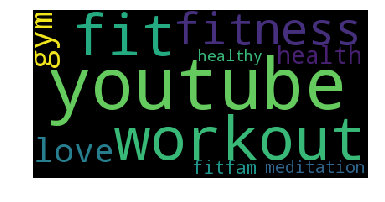

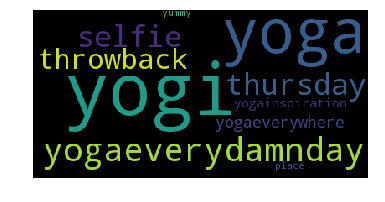

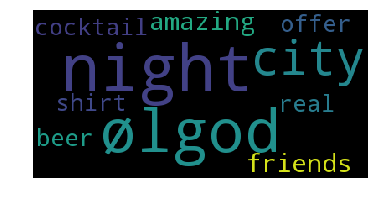

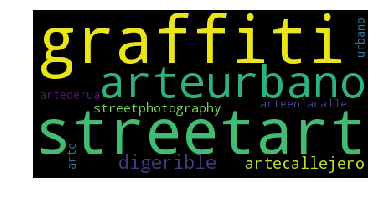

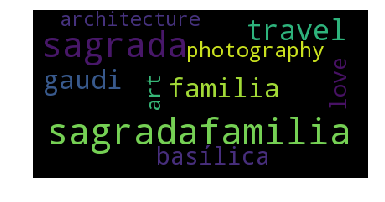

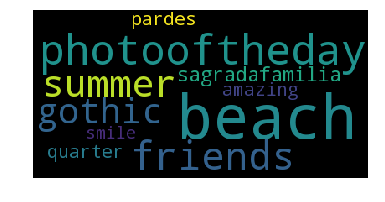

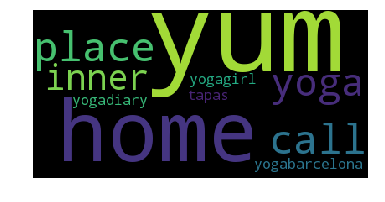

In [80]:
# display wordclouds for the topics
def terms_to_wordcounts(terms, multiplier=1000):
    return  " ".join([" ".join(int(multiplier*i[1]) * [i[0]]) for i in terms])

wordclouds = []
i = 0

for topic in topic_terms:
    wordcloud = WordCloud(background_color="black", collocations=False).generate(terms_to_wordcounts(topic))
    
    _ = plt.imshow(wordcloud)
    _ = plt.axis("off")
    _ = plt.savefig("terms_wordcloud_topic" + str(i))
    _ = plt.show()
    
    i += 1